/tmp/hsperfdata_kennedyc/ProjectImages/10y/histogram_0.386_0.391.npz
Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/GammaFit_Declination_42.png


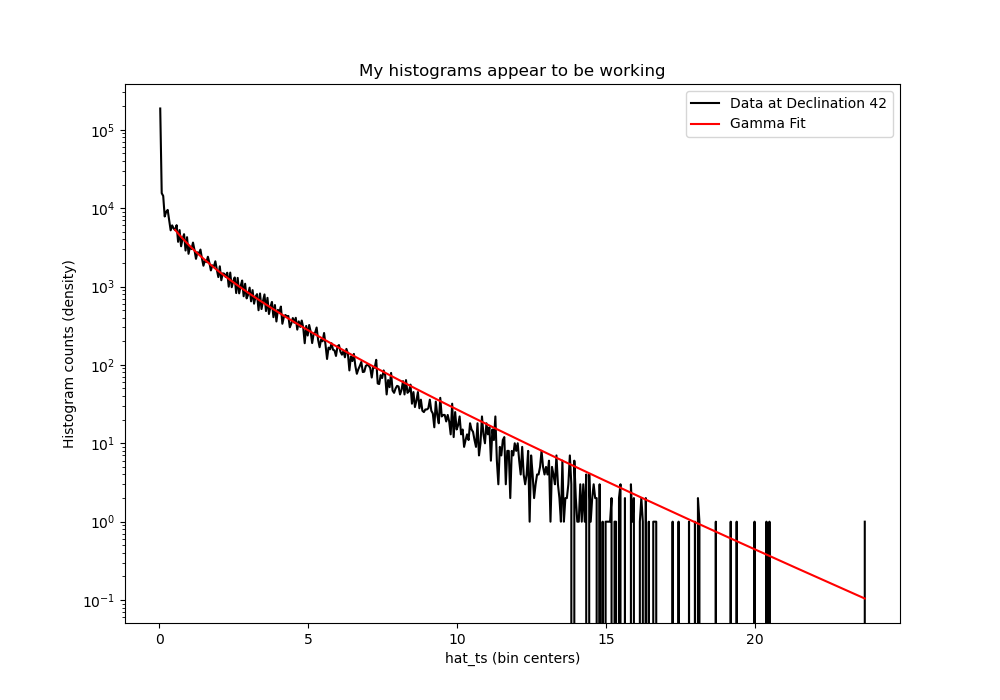

In [201]:
##~Working~##  Data Loading and Formatting  ##
##~~~~~~~~~##===============================##
%matplotlib ipympl 
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import curve_fit
from scipy.stats import gamma as gamma_dist_scipy
import scipy 
import os
import re


# # Load the data from the .npz file
# filename = '/tmp/icpy/icpy/histogram_data_variable_bins_200_ts_density.npz'
# data = np.load(filename)

# # Access the individual arrays
# histogram_2d = data['histogram_2d']
# x_edges = data['x_edges']
# y_edges = data['y_edges']

# # Define the specific declination to analyze
# declinations = [42]

# # Find the index corresponding to the desired declination
# declination_index = np.argmin(np.abs(x_edges - declination))

filename = '/tmp/hsperfdata_kennedyc/ProjectImages/10y/histogram_0.386_0.391.npz'

# Extract x_edges (declination) from the filename using regex
x_edges = float(re.search(r'histogram_(\d+\.\d+)_(\d+\.\d+)\.npz', filename).group(1))
# Load the 2D histogram and y_edges from the .npz file
data = np.load(filename)
histogram_1d = data['hist']
y_edges = data['bin_edges']
centers = (bins[:-1] + bins[1:]) / 2

print(filename)


# Extract the 1D histogram for the chosen declinatio

# Calculate the bin centers for the y-axis (hat_ts values)
hx = centers

# Define the gamma distribution function
def gamma_dist(x, a, b, loc=0.0):
    return scipy.stats.gamma.pdf(x, a, scale=1/b, loc=loc)

# Define the function to fit the gamma distribution
def fit_gamma(x, y, mu_cut):
    x_fit = x[x > mu_cut]
    y_fit = y[x > mu_cut]
    norm_factor = np.sum(y_fit)
    hy_fit_norm = y_fit / norm_factor
    popt, pcov = curve_fit(gamma_dist, x_fit, hy_fit_norm, p0=[1.0, 0.5, 0.0], maxfev=10000)
    return norm_factor, popt

# Fit the gamma distribution to the 1D histogram data
mu_cut = 0.5  # Set the cutoff
norm_factor, popt = fit_gamma(hx, histogram_1d, mu_cut)



ax.plot(hx, hy, 'k-', label='Data')
ax.plot(hx[hx > mu_cut], norm_factor * scipy.stats.gamma.pdf(hx[hx > mu_cut], *popt), 'r-', label='Fit')


ax.set_yscale('log')

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(hx, histogram_1d, 'k-', label=f'Data at Declination {declination}')
ax.plot(hx[hx > mu_cut], norm_factor * gamma_dist(hx[hx > mu_cut], *popt), 'r-', label='Gamma Fit')
ax.set_yscale('log')
ax.set_xlabel('hat_ts (bin centers)')
ax.set_ylabel('Histogram counts (density)')
ax.legend()
ax.set_title('My histograms appear to be working')
# Save the plot
save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'
os.makedirs(save_dir, exist_ok=True)
filename = f"GammaFit_Declination_{declination}.png"
filepath = os.path.join(save_dir, filename)
fig.savefig(filepath)
print(f"Plot saved as {filepath}")

plt.show()






In [202]:
mu_cut = 0.0

# function that fits a gamma distribution to the data and returns a scale factor and the popt parameters
def fit_gamma(x, y, mu_cut):
    x_fit = x[x > mu_cut]
    y_fit = y[x > mu_cut]
    norm_factor = np.sum(y_fit)
    hy_fit_norm = y_fit / norm_factor
    popt, pcov = curve_fit(scipy.stats.gamma.pdf, x_fit, hy_fit_norm, p0=[1.0, 0.0, 2.0], maxfev=10000)
    return norm_factor, popt

norm_factor, popt = fit_gamma(hx, hy, mu_cut=mu_cut)

fig, ax = plt.subplots()
ax.plot(hx, hy, 'k-', label='Data')
ax.plot(hx[hx > mu_cut], norm_factor * scipy.stats.gamma.pdf(hx[hx > mu_cut], *popt), 'r-', label='Fit')


ax.set_yscale('log')

NameError: name 'hy' is not defined

In [195]:
hx

array([ 0.025,  0.075,  0.125,  0.175,  0.225,  0.275,  0.325,  0.375,
        0.425,  0.475,  0.525,  0.575,  0.625,  0.675,  0.725,  0.775,
        0.825,  0.875,  0.925,  0.975,  1.025,  1.075,  1.125,  1.175,
        1.225,  1.275,  1.325,  1.375,  1.425,  1.475,  1.525,  1.575,
        1.625,  1.675,  1.725,  1.775,  1.825,  1.875,  1.925,  1.975,
        2.025,  2.075,  2.125,  2.175,  2.225,  2.275,  2.325,  2.375,
        2.425,  2.475,  2.525,  2.575,  2.625,  2.675,  2.725,  2.775,
        2.825,  2.875,  2.925,  2.975,  3.025,  3.075,  3.125,  3.175,
        3.225,  3.275,  3.325,  3.375,  3.425,  3.475,  3.525,  3.575,
        3.625,  3.675,  3.725,  3.775,  3.825,  3.875,  3.925,  3.975,
        4.025,  4.075,  4.125,  4.175,  4.225,  4.275,  4.325,  4.375,
        4.425,  4.475,  4.525,  4.575,  4.625,  4.675,  4.725,  4.775,
        4.825,  4.875,  4.925,  4.975,  5.025,  5.075,  5.125,  5.175,
        5.225,  5.275,  5.325,  5.375,  5.425,  5.475,  5.525,  5.575,
      

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/GammaFit_Declination_42.png


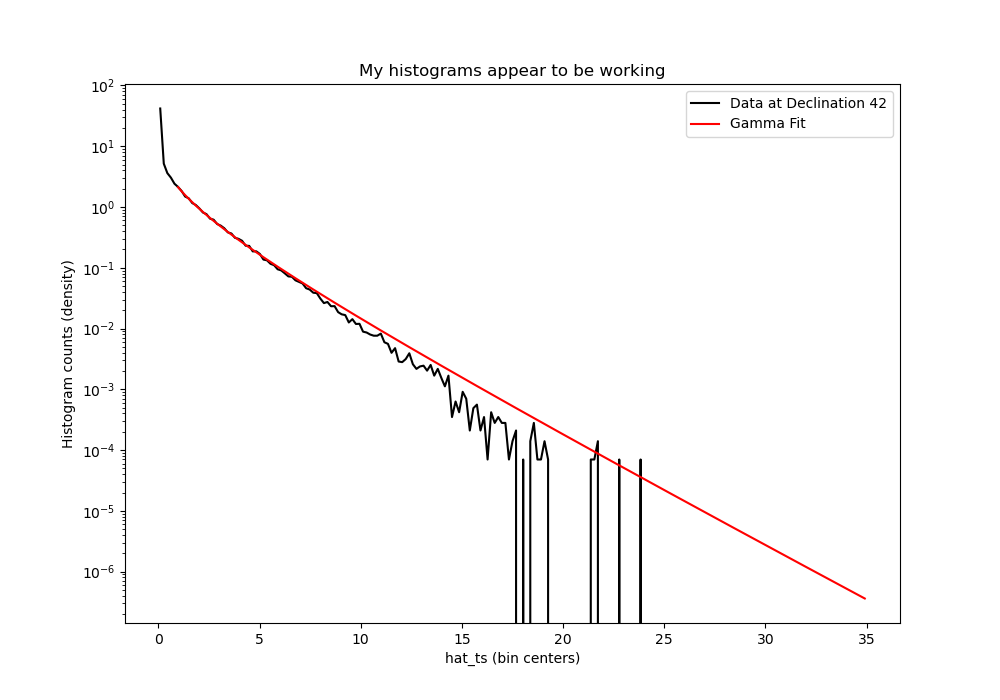

In [191]:
##~Working~##  Data Loading and Formatting  ##
##~~~~~~~~~##===============================##
%matplotlib ipympl 
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import curve_fit
from scipy.stats import gamma as gamma_dist_scipy
import scipy 
import os

# Load the data from the .npz file
filename = '/tmp/icpy/icpy/histogram_data_variable_bins_200_ts_density.npz'
data = np.load(filename)

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Define the specific declination to analyze
declinations = [42]

# Find the index corresponding to the desired declination
declination_index = np.argmin(np.abs(x_edges - declination))

# Extract the 1D histogram for the chosen declination
histogram_1d = histogram_2d[declination_index, :]

# Calculate the bin centers for the y-axis (hat_ts values)
hx = 0.5 * (y_edges[1:] + y_edges[:-1])

# Define the gamma distribution function
def gamma_dist(x, a, b, loc=0.0):
    return scipy.stats.gamma.pdf(x, a, scale=1/b, loc=loc)

# Define the function to fit the gamma distribution
def fit_gamma(x, y, mu_cut):
    x_fit = x[x > mu_cut]
    y_fit = y[x > mu_cut]
    norm_factor = np.sum(y_fit)
    hy_fit_norm = y_fit / norm_factor
    popt, pcov = curve_fit(gamma_dist, x_fit, hy_fit_norm, p0=[1.0, 0.5, 0.0], maxfev=10000)
    return norm_factor, popt

# Fit the gamma distribution to the 1D histogram data
mu_cut = 0.9  # Set the cutoff
norm_factor, popt = fit_gamma(hx, histogram_1d, mu_cut)

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(hx, histogram_1d, 'k-', label=f'Data at Declination {declination}')
ax.plot(hx[hx > mu_cut], norm_factor * gamma_dist(hx[hx > mu_cut], *popt), 'r-', label='Gamma Fit')
ax.set_yscale('log')
ax.set_xlabel('hat_ts (bin centers)')
ax.set_ylabel('Histogram counts (density)')
ax.legend()
ax.set_title('My histograms appear to be working')
# Save the plot
save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'
os.makedirs(save_dir, exist_ok=True)
filename = f"GammaFit_Declination_{declination}.png"
filepath = os.path.join(save_dir, filename)
fig.savefig(filepath)
print(f"Plot saved as {filepath}")

plt.show()

mu cut at 1.5 TS
0.18317355201596075
[0.88573429 0.55166108]


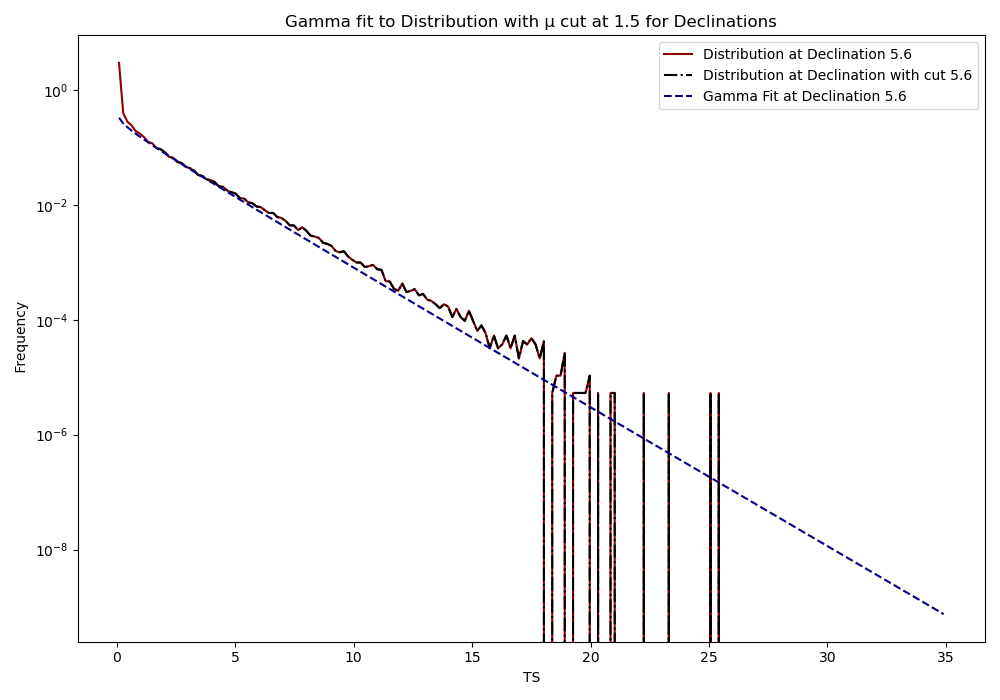

In [152]:
##~Working~##  Data Loading and Formatting  ##
##~~~~~~~~~##===============================##
%matplotlib ipympl 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import gamma as gamma_dist_scipy
import sys
import math

filename = '/tmp/hsperfdata_kennedyc/ProjectImages/10y/histogram_0.386_0.391.npz'
# def load_hist(filename):
#     data = np.load(filename)
#     h = data['hist']
#     bins = data['bin_edges']
#     centers = (bins[:-1] + bins[1:]) / 2
#     return centers, h, bins

def load_hist(filename):
    # Extract x_edges (declination) from the filename using regex
    x_edges = float(re.search(r'histogram_(\d+\.\d+)_(\d+\.\d+)\.npz', filename).group(1))
    # Load the 2D histogram and y_edges from the .npz file
    data = np.load(filename)
    histogram_2d = data['hist']
    y_edges = data['bin_edges']
    centers = (bins[:-1] + bins[1:]) / 2
    return y_edges, histogram_2d, x_edges, centers

# # Load the data from the .npz file
# filename = '/tmp/icpy/icpy/histogram_data_variable_bins_200_ts_density.npz'
# data = np.load(filename)

# # Access the individual arrays
# histogram_2d = data['histogram_2d']
# x_edges = data['x_edges']
# y_edges = data['y_edges']

# # Define the specific declination to analyze
# declinations = [5.6]


mu = 1.5
# Gamma fnuction
def gamma_func(x, a, b):
    return b**a * x ** (a - 1) * np.exp(-b * x) / math.gamma(a)

# Gamma fit function
def gamma_fit_func(x, xi, a, b):
    norm_int = gamma_dist_scipy.sf(mu, a, scale=1 / b)
    norm = xi / norm_int
    return norm * gamma_func(x, a, b)

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 7))

print(f'mu cut at {mu} TS')

raw_color = 'darkred'
cut_color = '#9400D3'
fit_color = 'darkblue'

# Plot the p-value distributions and fit the gamma model
for decl in declinations:
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :]) 
    
    if total_counts > 0:
        bin_widths = np.diff(y_edges)
        normalized_histogram = histogram_2d[idx, :] / (total_counts * bin_widths)
        
        xcenters = (y_edges[:-1] + y_edges[1:]) / 2
        
        ax.plot(xcenters, normalized_histogram, color=raw_color, label=f'Distribution at Declination {decl}')
        
        # Apply the mu filter to y_edges and normazed histogram
        filtered_mask = xcenters >= mu
        filtered_y_edges = xcenters[filtered_mask]
        filtered_histogram = normalized_histogram[filtered_mask]
        ax.plot(filtered_y_edges, filtered_histogram, color='black', linestyle='-.',label=f'Distribution at Declination with cut {decl}')
        # Caculate the ratio for xi
        ratio_y = np.sum(histogram_2d[idx, :][filtered_mask]) / total_counts
        xi = ratio_y
        
        # Perform the curve ftting and extract the fit parameters
        try:
            popt, pcov = curve_fit(
                lambda x, a, b: gamma_fit_func(x, xi, a, b),
                filtered_y_edges,
                filtered_histogram,
                p0=[0.7, 0.5], 
                bounds=([0.5, 0.1], [1.0, 1.0]),
                maxfev=10000,
            )
        except RuntimeError as e:
            print(f"Error in curve fitting: {e}")
            continue
        
        # Calculate and plot the fit results
        fit_results = gamma_fit_func(xcenters, xi, *popt)
        ax.plot(xcenters, fit_results, color=fit_color, linestyle='--', label=f'Gamma Fit at Declination {decl}')
        print(xi)
        print(popt)
        ax.set_yscale('log')
        ax.set_xlabel("TS")
        ax.set_ylabel(" Frequency")
        ax.legend()

# Finalize the plot
ax.set_title(f'Gamma fit to Distribution with μ cut at {mu} for Declinations')
plt.tight_layout()
plt.show()

In [165]:
x_edges[idx]

np.float64(5.291457286432163)

In [90]:
idx

np.int64(151)

ValueError: operands could not be broadcast together with shapes (474,) (199,) 

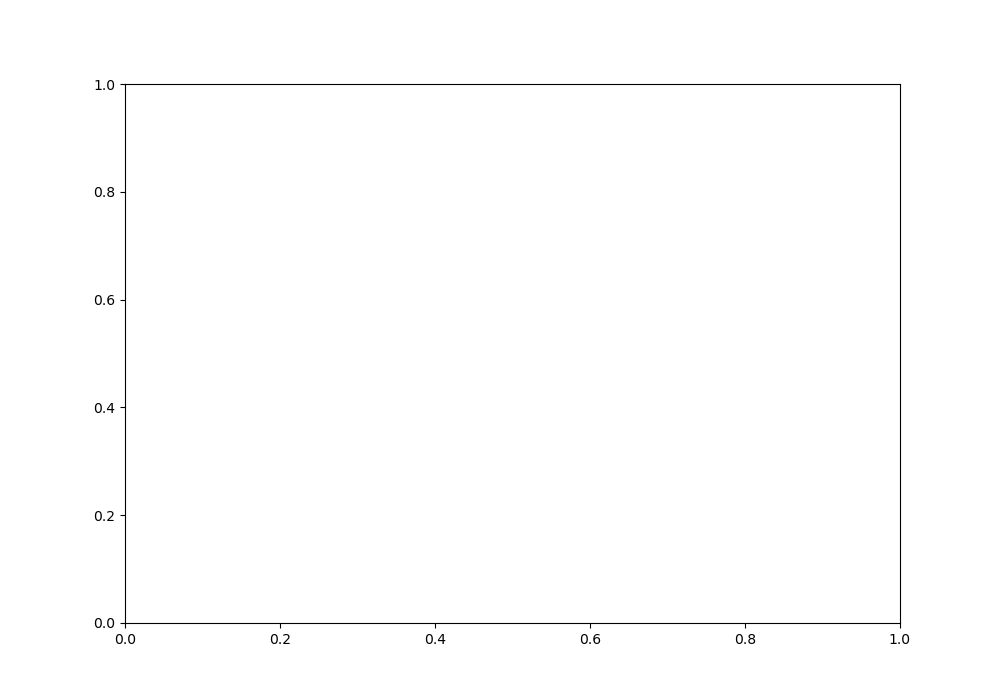

In [178]:
##~Working~##  Data Loading and Formatting  ##
##~~~~~~~~~##===============================##
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import gamma
import os
filename = '/tmp/hsperfdata_kennedyc/ProjectImages/10y/histogram_0.386_0.391.npz'
# def load_hist(filename):
#     data = np.load(filename)
#     h = data['hist']
#     bins = data['bin_edges']
#     centers = (bins[:-1] + bins[1:]) / 2
#     return centers, h, bins

def load_hist(filename):
    # Extract x_edges (declination) from the filename using regex
    x_edges = float(re.search(r'histogram_(\d+\.\d+)_(\d+\.\d+)\.npz', filename).group(1))
    # Load the 2D histogram and y_edges from the .npz file
    data = np.load(filename)
    histogram_2d = data['hist']
    y_edges = data['bin_edges']
    centers = (bins[:-1] + bins[1:]) / 2
    return y_edges, histogram_2d, x_edges, centers


fig, ax = plt.subplots(figsize=(10, 7))
# Load the data from the .npz file


# # Access the individual arrays
# histogram_2d = data['histogram_2d']
# x_edges = data['x_edges']
# y_edges = data['y_edges']

# Gamma fnuction
def gamma_func(x, a, b):
    return b**a * x ** (a - 1) * np.e ** (-b * x) / math.gamma(a)

def gamma_fit_func(x, xi, a, b):
    norm_int = gamma.sf(x=mu, a=a, loc=0, scale=1 / b)
    norm = xi / norm_int
    return norm * gamma_func(x, a, b)

def ts_to_pvalue(ts_value, xi, a, b):
    norm = xi / (gamma.sf(x=mu, a=a, loc=0, scale=1 / b))
    p_value = norm * gamma.sf(ts_value, a=a, loc=0, scale=1 / b)
    return p_value


# Plot the p-value distributions and fit the gamma model
for decl in declinations:
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d) 
    
    if total_counts > 0:
        bin_widths = np.diff(y_edges)
        normalized_histogram = histogram_2d / (total_counts * bin_widths)
        
        xcenters = centers
        
        # ax.plot(xcenters, normalized_histogram, color=raw_color, label=f'Distribution at Declination {decl}')
        
        # Apply the mu filter to y_edges and normazed histogram
        filtered_mask = xcenters >= mu
        filtered_y_edges = xcenters[filtered_mask]
        filtered_histogram = normalized_histogram[filtered_mask]
        # ax.plot(filtered_y_edges, filtered_histogram, color='black', linestyle='-.',label=f'Distribution at Declination with cut {decl}')
        # Caculate the ratio for xi
        ratio_y = np.sum(histogram_2d[filtered_mask]) / total_counts
        xi = ratio_y
        
        # Perform the curve ftting and extract the fit parameters
        try:
            popt, pcov = curve_fit(
                lambda x, a, b: gamma_fit_func(x, xi, a, b),
                filtered_y_edges,
                filtered_histogram,
                p0=[0.7, 0.5], 
                bounds=([0.5, 0.1], [1.0, 1.0]),
                maxfev=10000,
            )
        except RuntimeError as e:
            print(f"Error in curve fitting: {e}")
            continue

        cd_fit = np.cumsum(gamma_fit_func(xcenters, xi, *popt))
        acd_fit = 1 - cd_fit/cd_fit[-1]
        cd_hist = np.cumsum(normalized_histogram)
        acd_hist = 1 - cd_hist/cd_hist[-1]
        ax.plot(xcenters, ts_to_pvalue(xcenters, xi, *popt), label='ICpy')
        ax.plot(xcenters, acd_fit, label='ACD fit')
        ax.plot(xcenters, acd_hist, label='ACD hist')
ax.set_yscale("log")
ax.legend()
plt.show()

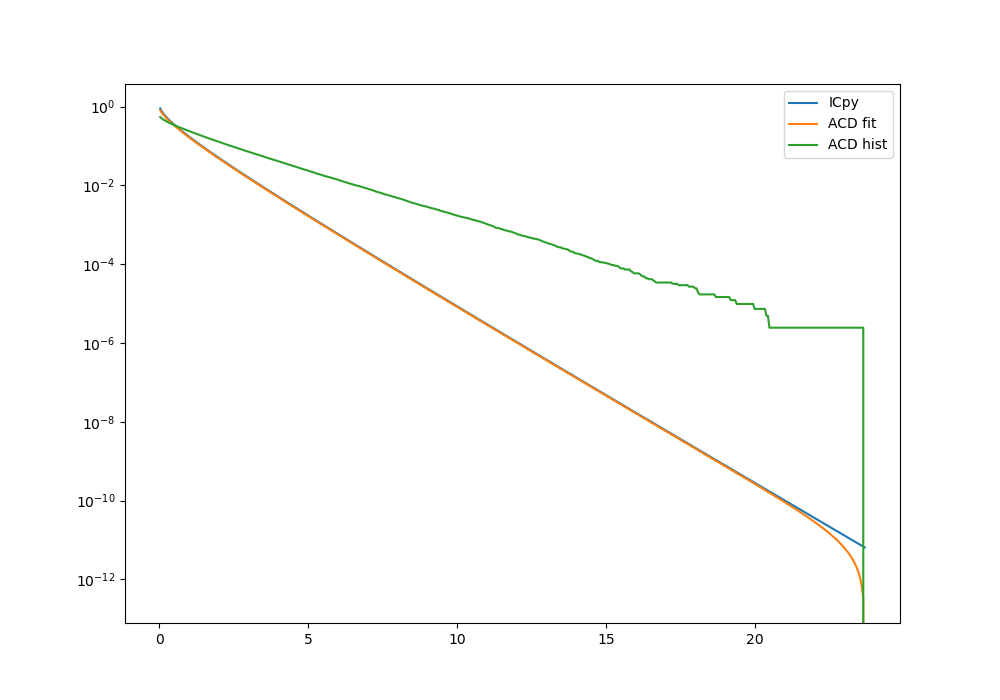

In [175]:
##~Working~##  Data Loading and Formatting  ##
##~~~~~~~~~##===============================##
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import gamma
import os
fig, ax = plt.subplots(figsize=(10, 7))
# Load the data from the .npz file

data = np.load(filename)

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Gamma fnuction
def gamma_func(x, a, b):
    return b**a * x ** (a - 1) * np.e ** (-b * x) / math.gamma(a)

def gamma_fit_func(x, xi, a, b):
    norm_int = gamma.sf(x=mu, a=a, loc=0, scale=1 / b)
    norm = xi / norm_int
    return norm * gamma_func(x, a, b)

def ts_to_pvalue(ts_value, xi, a, b):
    norm = xi / (gamma.sf(x=mu, a=a, loc=0, scale=1 / b))
    p_value = norm * gamma.sf(ts_value, a=a, loc=0, scale=1 / b)
    return p_value


# Plot the p-value distributions and fit the gamma model
for decl in declinations:
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :]) 
    
    if total_counts > 0:
        bin_widths = np.diff(y_edges)
        normalized_histogram = histogram_2d[idx, :] / (total_counts * bin_widths)
        
        xcenters = (y_edges[:-1] + y_edges[1:]) / 2
        
        # ax.plot(xcenters, normalized_histogram, color=raw_color, label=f'Distribution at Declination {decl}')
        
        # Apply the mu filter to y_edges and normazed histogram
        filtered_mask = xcenters >= mu
        filtered_y_edges = xcenters[filtered_mask]
        filtered_histogram = normalized_histogram[filtered_mask]
        # ax.plot(filtered_y_edges, filtered_histogram, color='black', linestyle='-.',label=f'Distribution at Declination with cut {decl}')
        # Caculate the ratio for xi
        ratio_y = np.sum(histogram_2d[idx, :][filtered_mask]) / total_counts
        xi = ratio_y
        
        # Perform the curve ftting and extract the fit parameters
        try:
            popt, pcov = curve_fit(
                lambda x, a, b: gamma_fit_func(x, xi, a, b),
                filtered_y_edges,
                filtered_histogram,
                p0=[0.7, 0.5], 
                bounds=([0.5, 0.1], [1.0, 1.0]),
                maxfev=10000,
            )
        except RuntimeError as e:
            print(f"Error in curve fitting: {e}")
            continue

        cd_fit = np.cumsum(gamma_fit_func(xcenters, xi, *popt))
        acd_fit = 1 - cd_fit/cd_fit[-1]
        cd_hist = np.cumsum(normalized_histogram)
        acd_hist = 1 - cd_hist/cd_hist[-1]
        ax.plot(xcenters, ts_to_pvalue(xcenters, xi, *popt), label='ICpy')
        ax.plot(xcenters, acd_fit, label='ACD fit')
        ax.plot(xcenters, acd_hist, label='ACD hist')
ax.set_yscale("log")
ax.legend()
plt.show()

In [161]:
mu = 0.5

In [112]:
b

np.float64(0.49914136713448476)

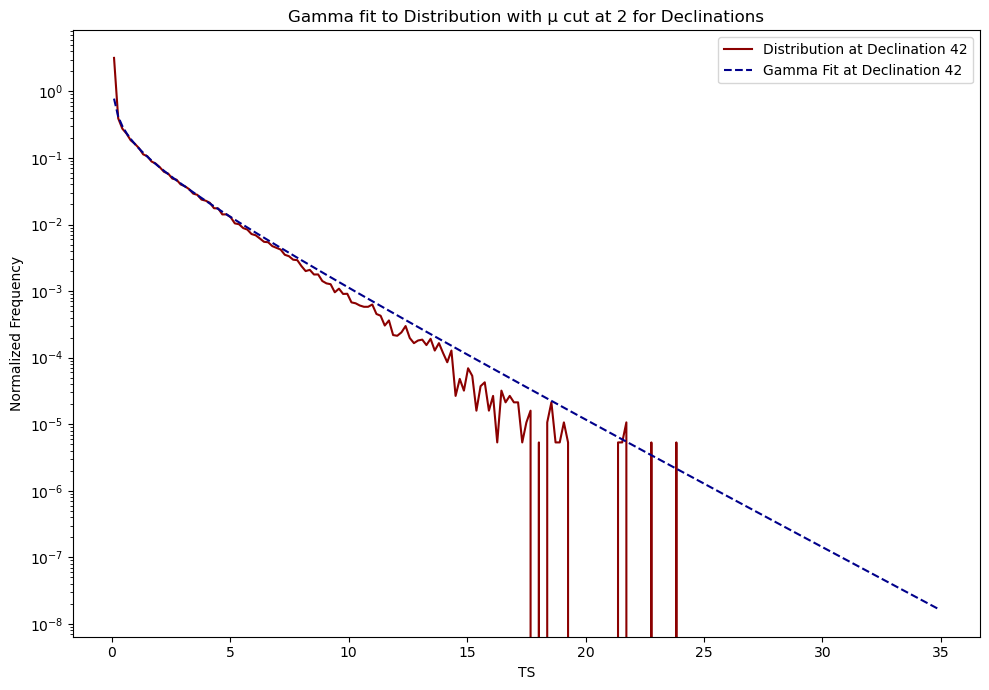

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import gamma as gamma_dist_scipy
import math

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

mu = 2

# Gamma function
def gamma_func(x, a, b):
    return b**a * x ** (a - 1) * np.exp(-b * x) / math.gamma(a)

# Gamma fit function
def gamma_fit_func(x, xi, a, b):
    norm_int = gamma_dist_scipy.sf(mu, a, scale=1 / b)
    norm = xi / norm_int
    return norm * gamma_func(x, a, b)

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 7))

raw_color = 'darkred'
fit_color = 'darkblue'

# Initialize a list to store the fit data points
fit_data_points = []

# Plot the p-value distributions and fit the gamma model
for decl in declinations:
    idx = np.abs(x_edges - decl).argmin()
    total_counts = np.sum(histogram_2d[idx, :])
    
    if total_counts > 0:
        bin_widths = np.diff(y_edges)
        normalized_histogram = histogram_2d[idx, :] / (total_counts * bin_widths)
        
        xcenters = (y_edges[:-1] + y_edges[1:]) / 2
        
        ax.plot(xcenters, normalized_histogram, color=raw_color, label=f'Distribution at Declination {decl}')
        
        # Apply the mu filter to y_edges and normalized histogram
        filtered_mask = xcenters >= mu
        filtered_y_edges = xcenters[filtered_mask]
        filtered_histogram = normalized_histogram[filtered_mask]

        # Calculate the ratio for xi
        ratio_y = np.sum(histogram_2d[idx, :][filtered_mask]) / total_counts
        xi = ratio_y
        
        # Perform the curve fitting and extract the fit parameters
        try:
            popt, pcov = curve_fit(
                lambda x, a, b: gamma_fit_func(x, xi, a, b),
                filtered_y_edges,
                filtered_histogram,
                p0=[0.7, 0.5], 
                bounds=([0.5, 0.1], [1.0, 1.0]),
                maxfev=10000,
            )
        except RuntimeError as e:
            print(f"Error in curve fitting: {e}")
            continue
        
        # Calculate the fit results and store the data points
        fit_results = gamma_fit_func(xcenters, xi, *popt)
        fit_data_points.append((xcenters, fit_results))
        
        # Plot the fit results
        ax.plot(xcenters, fit_results, color=fit_color, linestyle='--', label=f'Gamma Fit at Declination {decl}')
        
        ax.set_yscale('log')
        ax.set_xlabel("TS")
        ax.set_ylabel("Normalized Frequency")
        ax.legend()

# Finalize the plot
ax.set_title(f'Gamma fit to Distribution with μ cut at {mu} for Declinations')
plt.tight_layout()
plt.show()

Anti-cumulative p-value plot post-cut saved as /tmp/hsperfdata_kennedyc/ProjectImages/AntiCumulative_PValue_GammaFit_Declination_42_PostCut.png


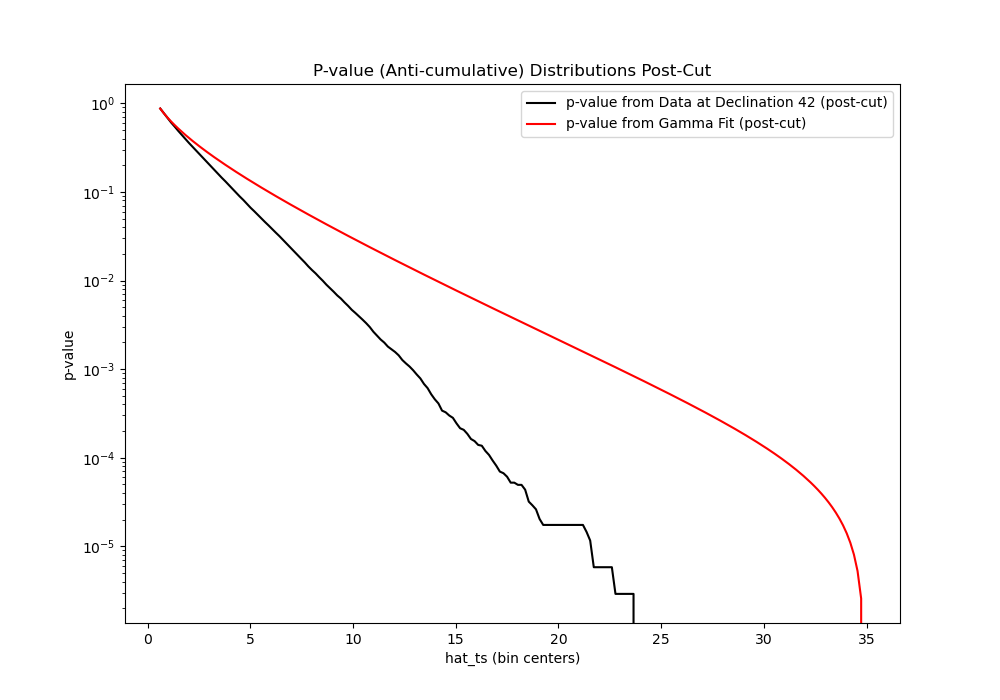

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import curve_fit
import os

# Load the data from the .npz file
filename = '/tmp/icpy/icpy/histogram_data_variable_bins_200_ts_density.npz'
data = np.load(filename)

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Find the index corresponding to the desired declination
declination_index = np.argmin(np.abs(x_edges - declination))

# Extract the 1D histogram for the chosen declination
histogram_1d = histogram_2d[declination_index, :]

# Calculate the bin centers for the y-axis (hat_ts values)
hx = 0.5 * (y_edges[1:] + y_edges[:-1])

# Define the gamma distribution function
def gamma_dist(x, a, b):
    return b**a * x ** (a - 1) * np.exp(-b * x) / gamma(a)

# Define the function to fit the gamma distribution
def fit_gamma(x, y, mu_cut):
    x_fit = x[x > mu_cut]
    y_fit = y[x > mu_cut]
    norm_factor = np.sum(y_fit)
    hy_fit_norm = y_fit / norm_factor
    popt, pcov = curve_fit(gamma_dist, x_fit, hy_fit_norm, p0=[0.5, 0.5])
    return norm_factor, popt

# Fit the gamma distribution to the 1D histogram data
mu_cut = 0.5  # Set the cutoff
norm_factor, popt = fit_gamma(hx, histogram_1d, mu_cut)

# Filter data above the cutoff
hx_post_cut = hx[hx > mu_cut]
histogram_1d_post_cut = histogram_1d[hx > mu_cut]

# Compute the cumulative distribution for the histogram data post-cut
cumulative_hist_post_cut = np.cumsum(histogram_1d_post_cut)
anti_cumulative_hist_post_cut = 1 - cumulative_hist_post_cut / cumulative_hist_post_cut[-1]

# Compute the anti-cumulative distribution for the gamma fit
gamma_values_post_cut = norm_factor * gamma_dist(hx_post_cut, *popt)
cumulative_gamma_post_cut = np.cumsum(gamma_values_post_cut)
anti_cumulative_gamma_post_cut = 1 - cumulative_gamma_post_cut / cumulative_gamma_post_cut[-1]

# Plotting the anti-cumulative distributions as p-values post-cut
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(hx_post_cut, anti_cumulative_hist_post_cut, 'k-', label=f'p-value from Data at Declination {declination} (post-cut)')
ax.plot(hx_post_cut, anti_cumulative_gamma_post_cut, 'r-', label='p-value from Gamma Fit (post-cut)')
ax.set_yscale('log')
ax.set_xlabel('hat_ts (bin centers)')
ax.set_ylabel('p-value')
ax.legend()
ax.set_title('P-value (Anti-cumulative) Distributions Post-Cut')
# Save the plot
save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'
os.makedirs(save_dir, exist_ok=True)
filename = f"AntiCumulative_PValue_GammaFit_Declination_{declination}_PostCut.png"
filepath = os.path.join(save_dir, filename)
fig.savefig(filepath)
print(f"Anti-cumulative p-value plot post-cut saved as {filepath}")

plt.show()

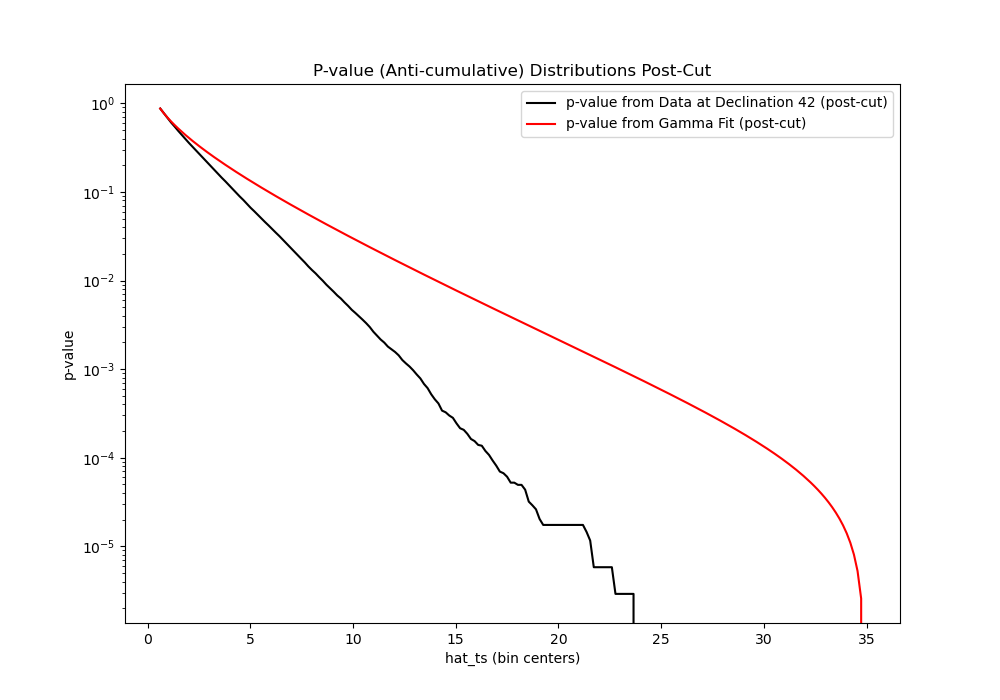

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import curve_fit
import os

# Load the data from a .npz file
def load_data(filename):
    """
    Load data from a .npz file and return the 2D histogram and bin edges.
    """
    data = np.load(filename)
    histogram_2d = data['histogram_2d']
    x_edges = data['x_edges']
    y_edges = data['y_edges']
    
    return histogram_2d, x_edges, y_edges
declination = 42
# Find the declination index from the x_edges
def get_declination_index(x_edges, declination):
    """
    Find the index in x_edges closest to the specified declination.
    """
    return np.argmin(np.abs(x_edges - declination))

# Extract the 1D histogram for a specific declination
def extract_1d_histogram(histogram_2d, declination_index):
    """
    Extract a 1D histogram slice from the 2D histogram for the given declination index.
    """
    return histogram_2d[declination_index, :]

# Calculate bin centers from bin edges
def calculate_bin_centers(edges):
    """
    Calculate the bin centers given the bin edges.
    """
    return 0.5 * (edges[1:] + edges[:-1])

# Define the gamma distribution function
def gamma_dist(x, a, b):
    """
    Gamma distribution function used for curve fitting.
    """
    return b**a * x ** (a - 1) * np.exp(-b * x) / gamma(a)

# Fit the gamma distribution to the data
def fit_gamma(x, y, mu_cut):
    """
    Fit the gamma distribution to the data above a specified cutoff.
    Returns the normalization factor and optimal parameters for the fit.
    """
    # Filter the data based on the cutoff value
    x_fit = x[x > mu_cut]
    y_fit = y[x > mu_cut]
    
    # Normalize the data
    norm_factor = np.sum(y_fit)
    hy_fit_norm = y_fit / norm_factor
    
    # Fit the gamma distribution
    popt, pcov = curve_fit(gamma_dist, x_fit, hy_fit_norm, p0=[0.5, 0.5])  # Initial guess
    return norm_factor, popt

# Compute the anti-cumulative distribution from a histogram
def compute_anti_cumulative(histogram):
    """
    Compute the anti-cumulative distribution (complementary CDF) from a histogram.
    """
    cumulative_hist = np.cumsum(histogram)
    return 1 - cumulative_hist / cumulative_hist[-1]

# Plot and save the p-value distributions
def plot_pvalue_distributions(hx_post_cut, anti_cumulative_hist_post_cut, anti_cumulative_gamma_post_cut, declination, save_dir):
    """
    Plot and save the p-value distributions for data and gamma fit.
    """
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Plot data p-value
    ax.plot(hx_post_cut, anti_cumulative_hist_post_cut, 'k-', label=f'p-value from Data at Declination {declination} (post-cut)')
    
    # Plot gamma fit p-value
    ax.plot(hx_post_cut, anti_cumulative_gamma_post_cut, 'r-', label='p-value from Gamma Fit (post-cut)')
    
    # Set logarithmic scale for y-axis
    ax.set_yscale('log')
    ax.set_xlabel('hat_ts (bin centers)')
    ax.set_ylabel('p-value')
    ax.legend()
    ax.set_title('P-value (Anti-cumulative) Distributions Post-Cut')
    # Show plot
    plt.show()

# Main processing function
def process_declination_pvalues(filename, declination, mu_cut = 0.5, save_dir='/tmp/hsperfdata_kennedyc/ProjectImages'):
    """
    Main function to process the data, fit a gamma distribution, and plot/save the p-value distributions.
    """
    # Load the data
    histogram_2d, x_edges, y_edges = load_data(filename)
    
    # Get the declination index and extract the 1D histogram for this declination
    declination_index = get_declination_index(x_edges, declination)
    histogram_1d = extract_1d_histogram(histogram_2d, declination_index)
    
    # Calculate the bin centers for the y-axis (hat_ts values)
    hx = calculate_bin_centers(y_edges)
    
    # Fit the gamma distribution to the 1D histogram data
    norm_factor, popt = fit_gamma(hx, histogram_1d, mu_cut)
    
    # Filter data and calculate post-cut histograms
    hx_post_cut = hx[hx > mu_cut]
    histogram_1d_post_cut = histogram_1d[hx > mu_cut]
    
    # Compute anti-cumulative distributions (complementary CDFs) for both data and gamma fit
    anti_cumulative_hist_post_cut = compute_anti_cumulative(histogram_1d_post_cut)
    gamma_values_post_cut = norm_factor * gamma_dist(hx_post_cut, *popt)
    anti_cumulative_gamma_post_cut = compute_anti_cumulative(gamma_values_post_cut)
    
    # Plot and save the results
    plot_pvalue_distributions(hx_post_cut, anti_cumulative_hist_post_cut, anti_cumulative_gamma_post_cut, declination, save_dir)

# Example usage
process_declination_pvalues(filename='/tmp/icpy/icpy/histogram_data_variable_bins_200_ts_density.npz', declination=42)


Anti-cumulative p-value plot with interpolation saved as /tmp/hsperfdata_kennedyc/ProjectImages/AntiCumulative_PValue_GammaFit_Declination_5.7_PostCut_Interpolation.png


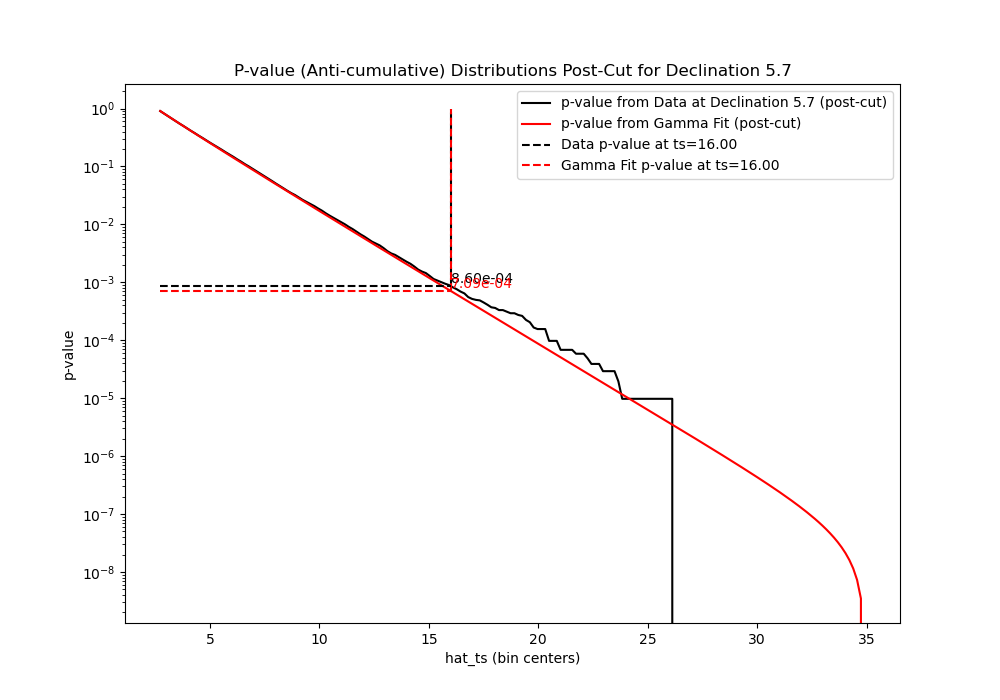

In [85]:
# Interpolation and plotting of lines from ts values to p-values
def plot_interpolated_pvalue_lines(ax, hx_post_cut, anti_cumulative_hist_post_cut, anti_cumulative_gamma_post_cut, ts_value):
    """
    Interpolates p-values for the given ts_value and plots lines from the ts to both data and fit p-values.
    """
    # Interpolate p-values for both data and gamma fit
    p_value_data = np.interp(ts_value, hx_post_cut, anti_cumulative_hist_post_cut)
    p_value_gamma = np.interp(ts_value, hx_post_cut, anti_cumulative_gamma_post_cut)

    # Plot vertical lines from ts to p-value on both curves
    ax.plot([ts_value, ts_value], [p_value_data, 1], 'k--', label=f"Data p-value at ts={ts_value:.2f}")
    ax.plot([ts_value, ts_value], [p_value_gamma, 1], 'r--', label=f"Gamma Fit p-value at ts={ts_value:.2f}")

    # Plot horizontal lines to p-value for data
    ax.plot([min(hx_post_cut), ts_value], [p_value_data, p_value_data], 'k--')
    ax.plot([min(hx_post_cut), ts_value], [p_value_gamma, p_value_gamma], 'r--')

    # Annotate the p-value on the graph for both the data and fit
    ax.text(ts_value, p_value_data, f'{p_value_data:.2e}', fontsize=10, verticalalignment='bottom', color='black')
    ax.text(ts_value, p_value_gamma, f'{p_value_gamma:.2e}', fontsize=10, verticalalignment='bottom', color='red')

# Plot the p-value distributions (including ts interpolation)
def plot_pvalue_distributions_with_interpolation(hx_post_cut, anti_cumulative_hist_post_cut, anti_cumulative_gamma_post_cut, declination, ts_value, save_dir):
    """
    Plot the anti-cumulative (p-value) distributions for both data and gamma fit,
    including interpolation from a specific ts_value and lines to the corresponding p-values.
    """
    fig, ax = plt.subplots(figsize=(10, 7))

    # Plot the anti-cumulative distribution (p-value) from data
    ax.plot(hx_post_cut, anti_cumulative_hist_post_cut, 'k-', label=f'p-value from Data at Declination {declination} (post-cut)')

    # Plot the anti-cumulative distribution (p-value) from gamma fit
    ax.plot(hx_post_cut, anti_cumulative_gamma_post_cut, 'r-', label='p-value from Gamma Fit (post-cut)')

    # Set logarithmic scale for the y-axis
    ax.set_yscale('log')

    # Plot the lines from the chosen ts value to the p-values
    plot_interpolated_pvalue_lines(ax, hx_post_cut, anti_cumulative_hist_post_cut, anti_cumulative_gamma_post_cut, ts_value)

    # Set axis labels and title
    ax.set_xlabel('hat_ts (bin centers)')
    ax.set_ylabel('p-value')
    ax.legend()
    ax.set_title(f'P-value (Anti-cumulative) Distributions Post-Cut for Declination {declination}')

    # Ensure save directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Save the plot to the specified directory
    filename = f"AntiCumulative_PValue_GammaFit_Declination_{declination}_PostCut_Interpolation.png"
    filepath = os.path.join(save_dir, filename)
    fig.savefig(filepath)
    print(f"Anti-cumulative p-value plot with interpolation saved as {filepath}")

    # Show the plot
    plt.show()

# New main processing function with interpolation
def process_declination_pvalues_interpolation(filename, declination, ts_value, mu_cut=2.6, save_dir='/tmp/hsperfdata_kennedyc/ProjectImages'):
    """
    Main function to process the data, fit a gamma distribution, and plot/save the p-value distributions
    with interpolation for a given ts value.
    """
    # Load the data
    histogram_2d, x_edges, y_edges = load_data(filename)
    
    # Get the declination index and extract the 1D histogram for this declination
    declination_index = get_declination_index(x_edges, declination)
    histogram_1d = extract_1d_histogram(histogram_2d, declination_index)
    
    # Calculate the bin centers for the y-axis (hat_ts values)
    hx = calculate_bin_centers(y_edges)
    
    # Fit the gamma distribution to the 1D histogram data
    norm_factor, popt = fit_gamma(hx, histogram_1d, mu_cut)
    
    # Filter data and calculate post-cut histograms
    hx_post_cut = hx[hx > mu_cut]
    histogram_1d_post_cut = histogram_1d[hx > mu_cut]
    
    # Compute anti-cumulative distributions (complementary CDFs) for both data and gamma fit
    anti_cumulative_hist_post_cut = compute_anti_cumulative(histogram_1d_post_cut)
    gamma_values_post_cut = norm_factor * gamma_dist(hx_post_cut, *popt)
    anti_cumulative_gamma_post_cut = compute_anti_cumulative(gamma_values_post_cut)
    
    # Plot and save the results with interpolation for the given ts_value
    plot_pvalue_distributions_with_interpolation(hx_post_cut, anti_cumulative_hist_post_cut, anti_cumulative_gamma_post_cut, declination, ts_value, save_dir)

# Example usage
process_declination_pvalues_interpolation(
    filename='/tmp/icpy/icpy/histogram_data_variable_bins_200_ts_density.npz',
    declination=5.7,
    ts_value=16  # Example test statistic value to plot lines for
)

In [56]:
anti_cumulative_hist_post_cut

array([9.07163097e-01, 8.27868551e-01, 7.52401192e-01, 6.84349010e-01,
       6.27051593e-01, 5.72054169e-01, 5.23993523e-01, 4.77377272e-01,
       4.34597409e-01, 3.98478325e-01, 3.62929639e-01, 3.32459336e-01,
       3.03709428e-01, 2.76615515e-01, 2.53946787e-01, 2.31590859e-01,
       2.12491720e-01, 1.94082579e-01, 1.77863031e-01, 1.62048281e-01,
       1.48119526e-01, 1.35625966e-01, 1.23141606e-01, 1.12524840e-01,
       1.02285273e-01, 9.32141017e-02, 8.55965261e-02, 7.80249503e-02,
       7.17505704e-02, 6.46941930e-02, 5.86130124e-02, 5.35806285e-02,
       4.87322441e-02, 4.41506587e-02, 4.03786708e-02, 3.67538824e-02,
       3.34142931e-02, 3.06911018e-02, 2.81059101e-02, 2.54103187e-02,
       2.32299257e-02, 2.13163318e-02, 1.95959373e-02, 1.78847428e-02,
       1.64495474e-02, 1.49683521e-02, 1.34043571e-02, 1.20979613e-02,
       1.08191654e-02, 1.00003680e-02, 9.19997056e-03, 8.60197247e-03,
       8.04997424e-03, 7.31397660e-03, 6.78957827e-03, 6.23758004e-03,
      

In [57]:
anti_cumulative_gamma_post_cut

array([9.09781433e-01, 8.28240195e-01, 7.54451518e-01, 6.87605716e-01,
       6.26990616e-01, 5.71977336e-01, 5.22008638e-01, 4.76589270e-01,
       4.35277913e-01, 3.97680376e-01, 3.63443830e-01, 3.32251874e-01,
       3.03820300e-01, 2.77893426e-01, 2.54240919e-01, 2.32655020e-01,
       2.12948120e-01, 1.94950628e-01, 1.78509093e-01, 1.63484546e-01,
       1.49751032e-01, 1.37194301e-01, 1.25710655e-01, 1.15205906e-01,
       1.05594454e-01, 9.67984632e-02, 8.87471152e-02, 8.13759486e-02,
       7.46262594e-02, 6.84445639e-02, 6.27821145e-02, 5.75944630e-02,
       5.28410671e-02, 4.84849336e-02, 4.44922975e-02, 4.08323305e-02,
       3.74768769e-02, 3.44002155e-02, 3.15788422e-02, 2.89912739e-02,
       2.66178699e-02, 2.44406695e-02, 2.24432452e-02, 2.06105682e-02,
       1.89288869e-02, 1.73856158e-02, 1.59692345e-02, 1.46691957e-02,
       1.34758414e-02, 1.23803266e-02, 1.13745493e-02, 1.04510873e-02,
       9.60314005e-03, 8.82447556e-03, 8.10938237e-03, 7.45262525e-03,
      

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_42.png


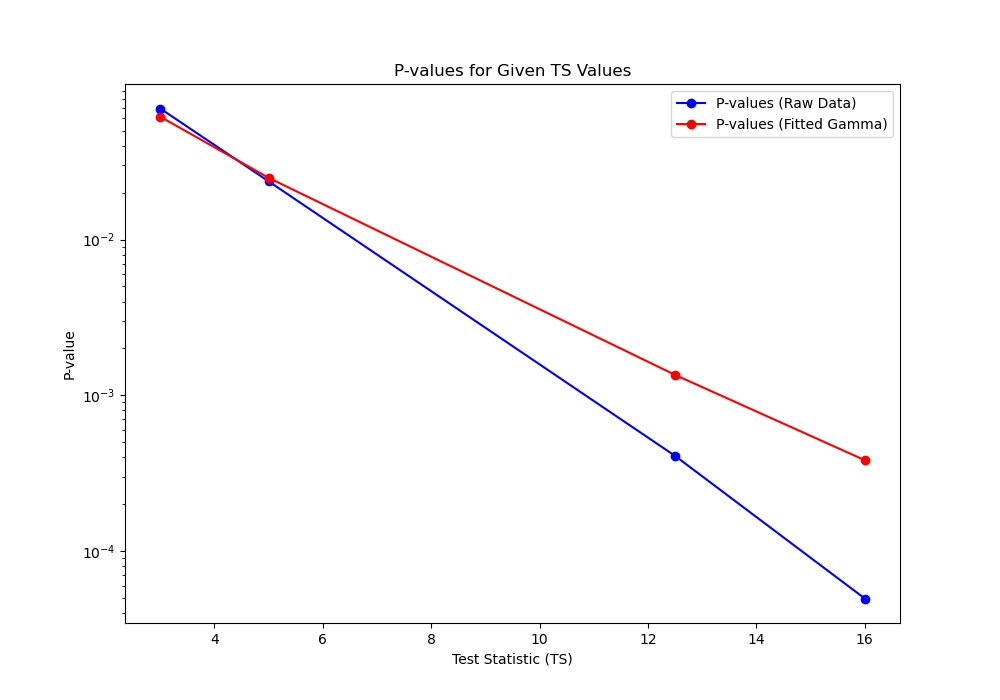

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, gammaincc
from scipy.optimize import curve_fit
import os

# Load the data from the .npz file
filename = '/tmp/icpy/icpy/histogram_data_variable_bins_200_ts_density.npz'
data = np.load(filename)

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Define the specific declination to analyze
declination = 42  # Replace with the desired declination

# Find the index corresponding to the desired declination
declination_index = np.argmin(np.abs(x_edges - declination))

# Extract the 1D histogram for the chosen declination
histogram_1d = histogram_2d[declination_index, :]

# Calculate the bin centers for the y-axis (hat_ts values)
hx = 0.5 * (y_edges[1:] + y_edges[:-1])

# Define the gamma distribution function
def gamma_dist(x, a, b):
    return b**a * x ** (a - 1) * np.exp(-b * x) / gamma(a)

# Define the function to fit the gamma distribution
def fit_gamma(x, y, mu_cut):
    x_fit = x[x > mu_cut]
    y_fit = y[x > mu_cut]
    norm_factor = np.sum(y_fit)
    hy_fit_norm = y_fit / norm_factor
    popt, pcov = curve_fit(gamma_dist, x_fit, hy_fit_norm, p0=[0.5, 0.5])
    return norm_factor, popt

# Fit the gamma distribution to the 1D histogram data
mu_cut = 1.0  # Set the cutoff
norm_factor, popt = fit_gamma(hx, histogram_1d, mu_cut)

# Define the TS values for which to calculate the p-values
ts_values = np.array([3, 5, 12.5, 16])

# Calculate p-values from the raw distribution
p_values_raw = np.array([np.sum(histogram_1d[hx >= ts]) / np.sum(histogram_1d) for ts in ts_values])

# Calculate p-values from the fitted gamma distribution
a, b = popt
p_values_fitted = gammaincc(a, b * ts_values)

# Plotting the p-values
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(ts_values, p_values_raw, 'bo-', label='P-values (Raw Data)')
ax.plot(ts_values, p_values_fitted, 'ro-', label='P-values (Fitted Gamma)')
ax.set_yscale('log')
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('P-value')
ax.legend()
ax.set_title('P-values for Given TS Values')
# Save the plot
save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'
os.makedirs(save_dir, exist_ok=True)
filename = f"PValues_Declination_{declination}.png"
filepath = os.path.join(save_dir, filename)
fig.savefig(filepath)
print(f"Plot saved as {filepath}")
plt.show()



Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_42.png


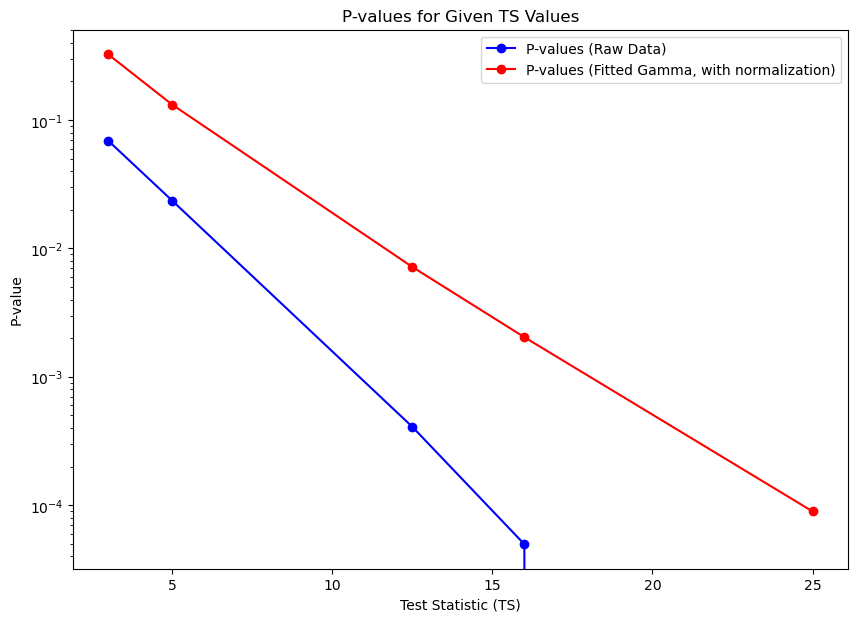

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.stats import gamma as gamma_dist
from scipy.optimize import curve_fit
import os

# Load the data from the .npz file
filename = '/tmp/icpy/icpy/histogram_data_variable_bins_200_ts_density.npz'
data = np.load(filename)

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Define the specific declination to analyze
declination = 42  # Replace with the desired declination

# Find the index corresponding to the desired declination
declination_index = np.argmin(np.abs(x_edges - declination))

# Extract the 1D histogram for the chosen declination
histogram_1d = histogram_2d[declination_index, :]

# Calculate the bin centers for the y-axis (hat_ts values)
hx = 0.5 * (y_edges[1:] + y_edges[:-1])

# Define the gamma distribution function
def gamma_dist_func(x, a, b):
    return b**a * x ** (a - 1) * np.exp(-b * x) / gamma(a)

# Define the function to fit the gamma distribution
def fit_gamma(x, y, mu_cut):
    x_fit = x[x > mu_cut]
    y_fit = y[x > mu_cut]
    norm_factor = np.sum(y_fit)
    hy_fit_norm = y_fit / norm_factor
    popt, pcov = curve_fit(gamma_dist_func, x_fit, hy_fit_norm, p0=[0.5, 0.5])
    return norm_factor, popt

# Fit the gamma distribution to the 1D histogram data
mu_cut = 1.0  # Set the cutoff
norm_factor, popt = fit_gamma(hx, histogram_1d, mu_cut)

# Define the TS values for which to calculate the p-values
ts_values = np.array([3, 5, 12.5, 16, 25])

# Calculate p-values from the raw distribution
p_values_frequentist = np.array([np.sum(histogram_1d[hx >= ts]) / np.sum(histogram_1d) for ts in ts_values])

# Use fitted parameters for gamma distribution
a, b = popt

# Define the new function to calculate p-values based on the gamma fit
def ts_to_pvalue(ts_value, xi, a, b, ts_threshold):
    """
    Compute p-value using the gamma distribution survival function.
    """
    norm = xi / gamma_dist.sf(ts_threshold, a=a, loc=0, scale=1 / b)
    p_value = norm * gamma_dist.sf(ts_value, a=a, loc=0, scale=1 / b)
    return p_value

# Set normalization factor and threshold
xi = 1  # Normalization factor can be computed based on your data
ts_threshold = mu_cut  # Use the same threshold used for fitting

# Calculate p-values using the new method with normalization
p_values_fitted = np.array([ts_to_pvalue(ts, xi, a, b, ts_threshold) for ts in ts_values])

# Plotting the p-values
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(ts_values, p_values_raw, 'bo-', label='P-values (Raw Data)')
ax.plot(ts_values, p_values_fitted_new, 'ro-', label='P-values (Fitted Gamma, with normalization)')
ax.set_yscale('log')
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('P-value')
ax.legend()
ax.set_title('P-values for Given TS Values')

# Save the plot
save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'
os.makedirs(save_dir, exist_ok=True)
filename = f"PValues_Declination_{declination}.png"
filepath = os.path.join(save_dir, filename)
fig.savefig(filepath)
print(f"Plot saved as {filepath}")
plt.show()

/tmp/ipykernel_4134/71518325.py:22: RuntimeWarning: invalid value encountered in scalar power
  return b**a * x ** (a - 1) * np.exp(-b * x) / gamma(a)


Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_0.5.png


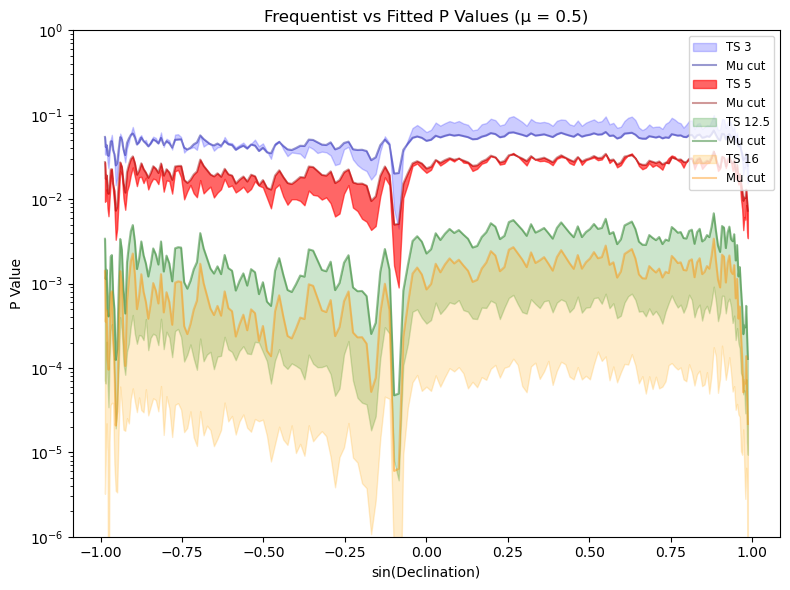

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_1.png


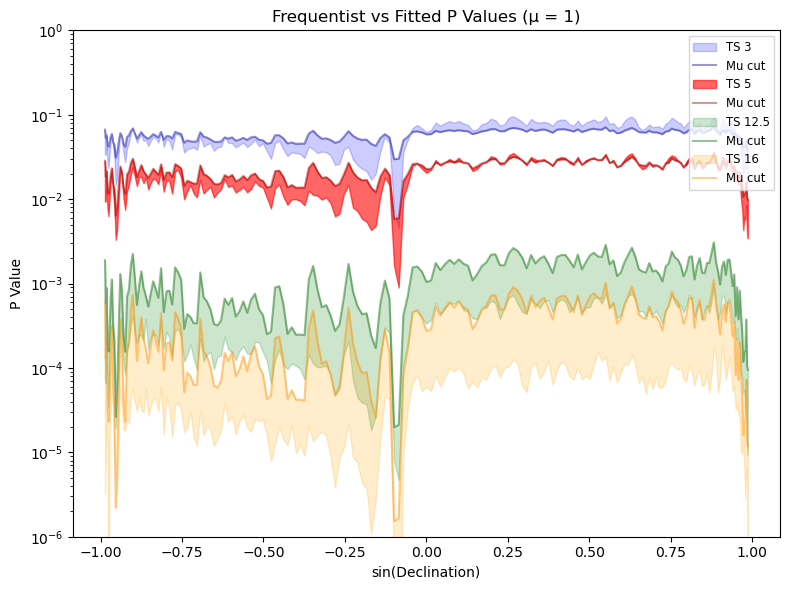

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_1.5.png


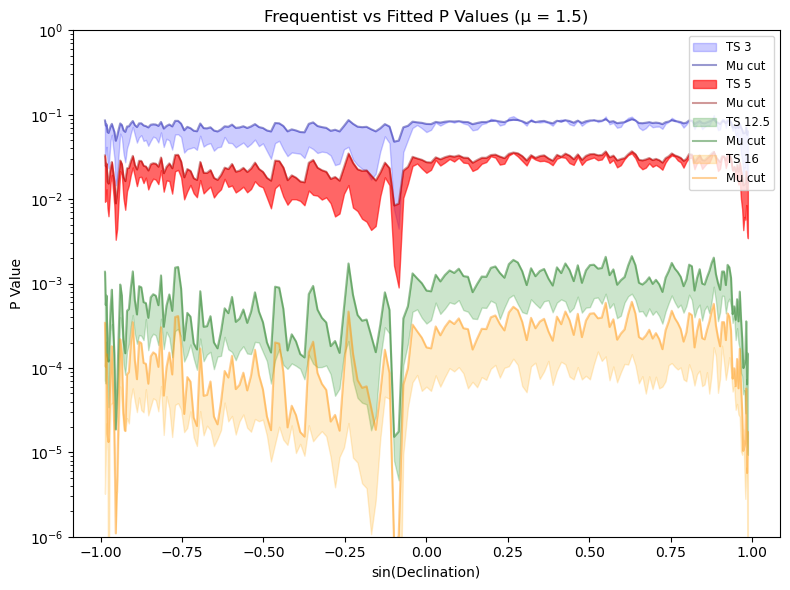

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_2.png


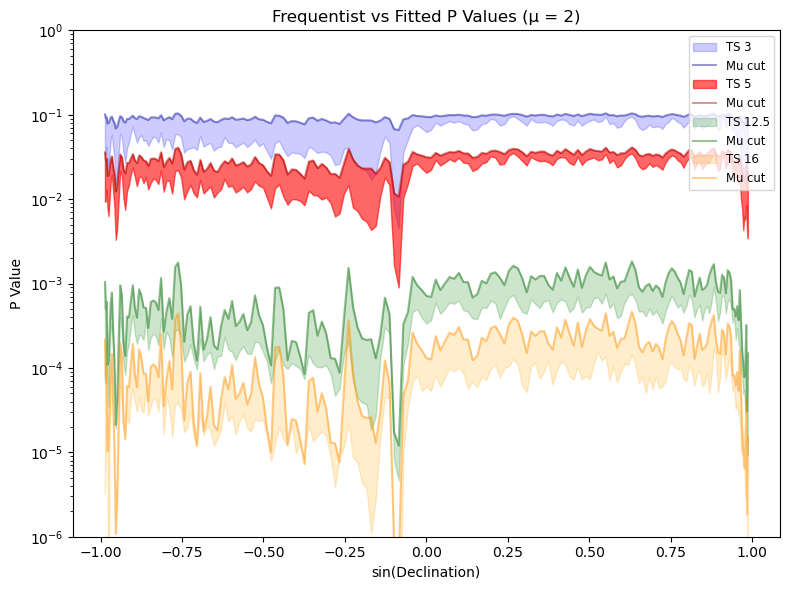

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_2.5.png


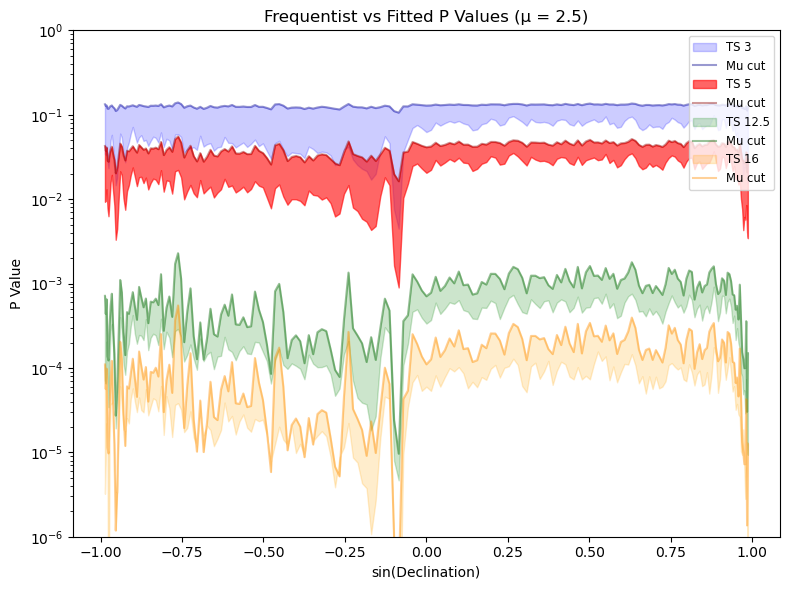

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_3.png


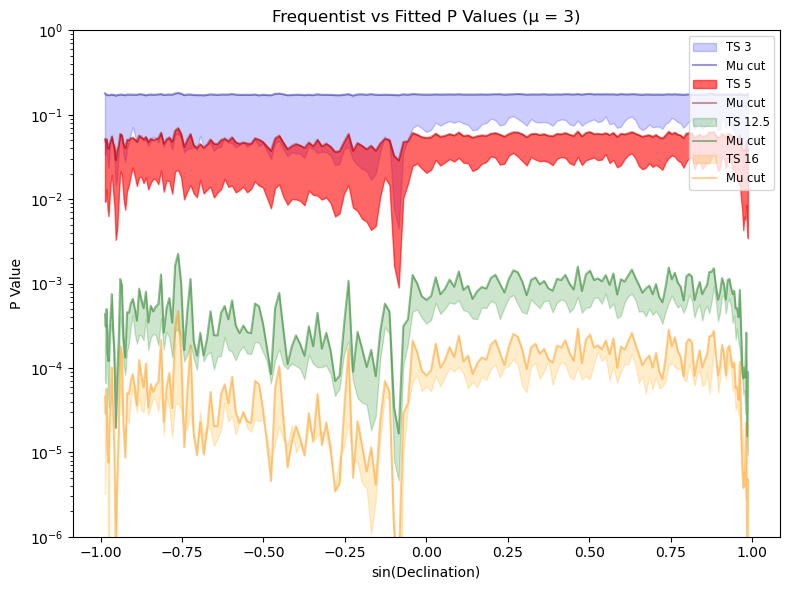

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_3.5.png


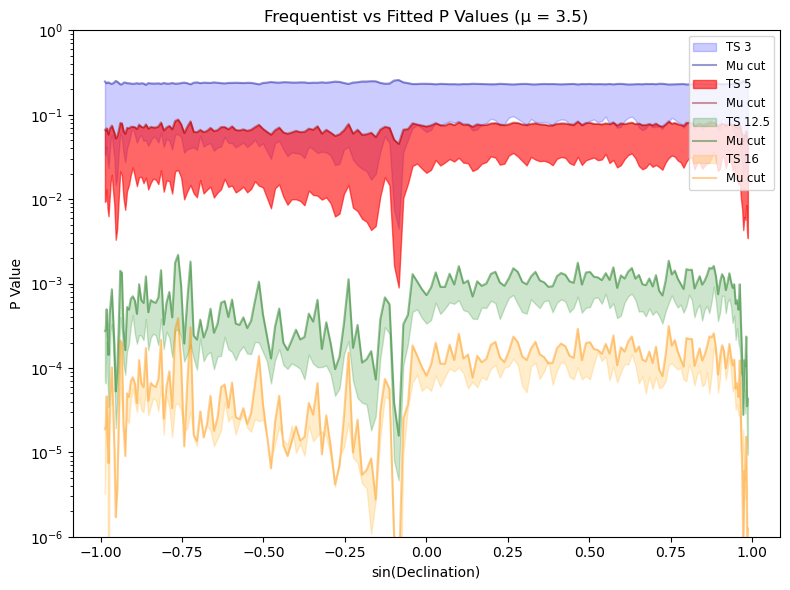

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_4.png


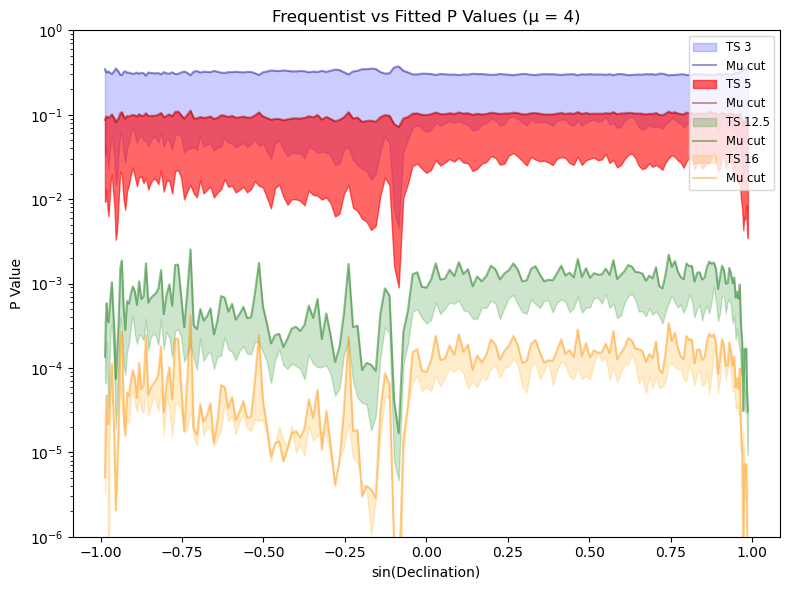

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_4.5.png


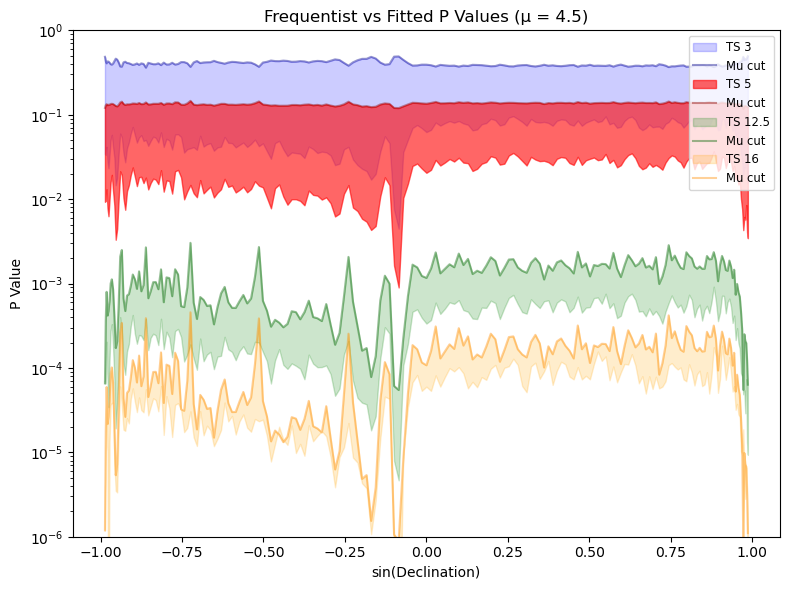

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_5.png


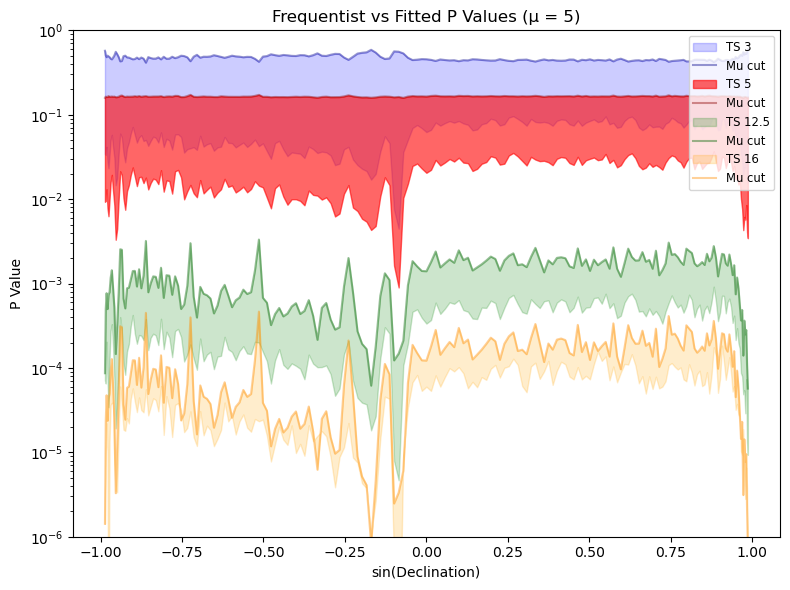

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, gammaincc
from scipy.optimize import curve_fit
from scipy.stats import chi2
import os

# Load the data from the .npz file
filename = '/tmp/icpy/icpy/histogram_data_variable_bins_200_ts_density.npz'
data = np.load(filename)

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Calculate the bin centers for the y-axis (hat_ts values)
hx = 0.5 * (y_edges[1:] + y_edges[:-1])

# Define the gamma distribution function
def gamma_dist(x, a, b):
    return b**a * x ** (a - 1) * np.exp(-b * x) / gamma(a)

# Define the function to fit the gamma distribution
def fit_gamma(x, y, mu_cut):
    x_fit = x[x > mu_cut]
    y_fit = y[x > mu_cut]
    norm_factor = np.sum(y_fit)
    hy_fit_norm = y_fit / norm_factor
    popt, pcov = curve_fit(gamma_dist, x_fit, hy_fit_norm, p0=[0.5, 0.5])
    return norm_factor, popt

# Define the TS values for which to calculate the p-values
ts_values = np.array([3, 5, 12.5, 16])

# Store the results for all declination bins
sin_x_edges = np.sin(np.radians(x_edges))
sin_x_midpoints = (sin_x_edges[:-1] + sin_x_edges[1:]) / 2  # Calculate the midpoints of sin(declination)

# Loop over mu values
mu_values = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]  # Set the desired mu values here

for i, mu in enumerate(mu_values):
    frequentist_ts_3 = []
    fitted_ts_3 = []
    frequentist_ts_5 = []
    fitted_ts_5 = []
    frequentist_ts_12_5 = []
    fitted_ts_12_5 = []
    frequentist_ts_16 = []
    fitted_ts_16 = []

    for declination_index in range(len(sin_x_midpoints)):
        # Extract the 1D histogram for the current declination
        histogram_1d = histogram_2d[declination_index, :]
        
        total_counts = np.sum(histogram_1d)
        if total_counts > 0:
            ###################
            ## Missing Code  ##
            ###################    
            # Fit the gamma distribution to the 1D histogram data
            norm_factor, popt = fit_gamma(hx, histogram_1d, mu)
            a, b = popt
            
            # Calculate and store the empirical and fitted values for specific TS values
            for ts_value, emp_list, fitted_list in [
                (3, frequentist_ts_3, fitted_ts_3),
                (5, frequentist_ts_5, fitted_ts_5),
                (12.5, frequentist_ts_12_5, fitted_ts_12_5),
                (16, frequentist_ts_16, fitted_ts_16)
            ]:
                # Frequentist p-value
                empirical_p_value = np.sum(histogram_1d[hx >= ts_value]) / np.sum(histogram_1d)
                emp_list.append(empirical_p_value)

                # Fitted p-value using the gamma distribution
                fitted_p_value = gammaincc(a, b * ts_value)
                fitted_list.append(fitted_p_value)

    # Clip y-values to ensure they are not below 10^-8
    frequentist_ts_3 = np.clip(frequentist_ts_3, 1e-8, None)
    fitted_ts_3 = np.clip(fitted_ts_3, 1e-8, None)
    
    frequentist_ts_5 = np.clip(frequentist_ts_5, 1e-8, None)
    fitted_ts_5 = np.clip(fitted_ts_5, 1e-8, None)
    
    frequentist_ts_12_5 = np.clip(frequentist_ts_12_5, 1e-8, None)
    fitted_ts_12_5 = np.clip(fitted_ts_12_5, 1e-8, None)
    
    frequentist_ts_16 = np.clip(frequentist_ts_16, 1e-8, None)
    fitted_ts_16 = np.clip(fitted_ts_16, 1e-8, None)

    # Create a new figure and axis for each mu value
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_ylim(1e-6, None)

    # Plot for each sigma level with fill_between
    ax.fill_between(sin_x_midpoints, frequentist_ts_3, fitted_ts_3, color='blue', alpha=0.2, label='TS 3 ')
    ax.plot(sin_x_midpoints, fitted_ts_3, color='darkblue', linestyle='-', alpha=0.4, label='Mu cut ')

    ax.fill_between(sin_x_midpoints, frequentist_ts_5, fitted_ts_5, color='red', alpha=0.6, label='TS 5')
    ax.plot(sin_x_midpoints, fitted_ts_5, color='darkred', linestyle='-', alpha=0.4, label='Mu cut ')

    ax.fill_between(sin_x_midpoints, frequentist_ts_12_5, fitted_ts_12_5, color='green', alpha=0.2, label='TS 12.5')
    ax.plot(sin_x_midpoints, fitted_ts_12_5, color='darkgreen', linestyle='-', alpha=0.4, label='Mu cut ')

    ax.fill_between(sin_x_midpoints, frequentist_ts_16, fitted_ts_16, color='orange', alpha=0.2, label='TS 16')
    ax.plot(sin_x_midpoints, fitted_ts_16, color='darkorange', linestyle='-', alpha=0.4, label='Mu cut ')

    ax.axhline(y=0, color='grey', linestyle='--', linewidth=0.5)
    ax.set_xlabel('sin(Declination)')
    ax.set_ylabel('P Value')
    ax.set_yscale('log')
    ax.set_title(f'Frequentist vs Fitted P Values (μ = {mu})')
    ax.legend(loc='upper right', fontsize='small')
    ax.grid(False)
    plt.tight_layout()

    # Save and show the plot
    save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'
    os.makedirs(save_dir, exist_ok=True)
    filename = f"PValues_Declination_mu_{mu}.png"
    filepath = os.path.join(save_dir, filename)
    fig.savefig(filepath)
    print(f"Plot saved as {filepath}")
    plt.show()
plt.show()

Optimal mu_cut: 1.143072406879671
Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_0.0_OptimalMuCut.png


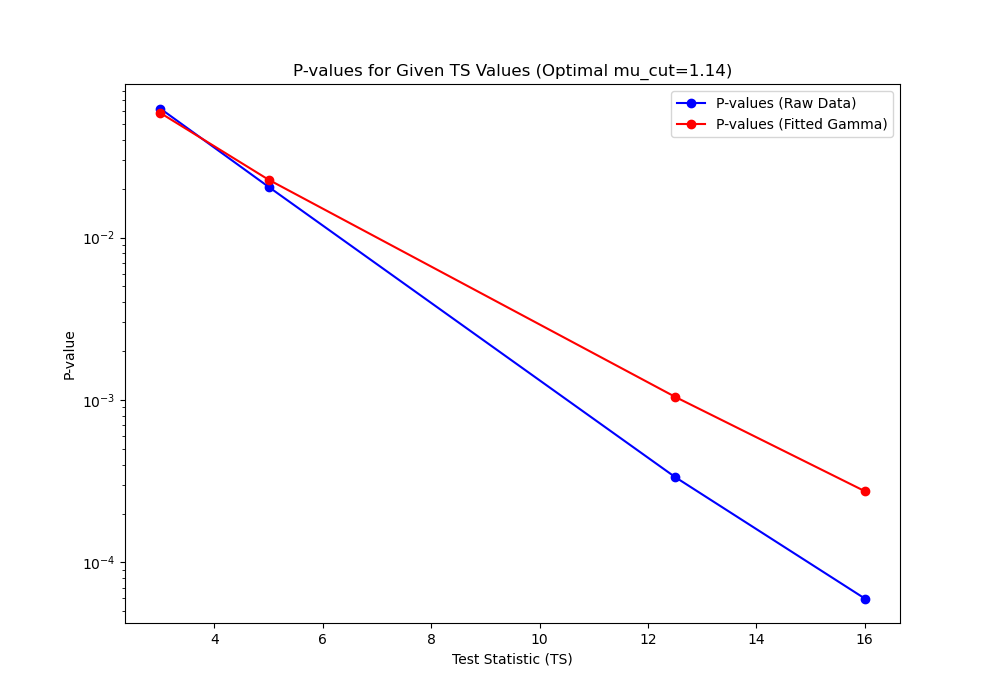

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, gammaincc, gammaln
from scipy.optimize import curve_fit, differential_evolution
import os

# Load the data from the .npz file
filename = '/tmp/icpy/icpy/histogram_data_variable_bins_200_ts_density.npz'
data = np.load(filename)

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Define the specific declination to analyze
declination = 0.0  # Replace with the desired declination

# Find the index corresponding to the desired declination
declination_index = np.argmin(np.abs(x_edges - declination))

# Extract the 1D histogram for the chosen declination
histogram_1d = histogram_2d[declination_index, :]

# Calculate the bin centers for the y-axis (hat_ts values)
hx = 0.5 * (y_edges[1:] + y_edges[:-1])

# Define the gamma distribution function with better numerical stability
def gamma_dist(x, a, b):
    # Avoid log(0) by ensuring x > 0
    with np.errstate(divide='ignore', invalid='ignore', over='ignore'):
        return np.exp(a * np.log(b) + (a - 1) * np.log(x) - b * x - gammaln(a))

# Define the function to fit the gamma distribution
def fit_gamma(x, y, mu_cut):
    x_fit = x[x > mu_cut]
    y_fit = y[x > mu_cut]
    norm_factor = np.sum(y_fit)
    if norm_factor == 0 or len(x_fit) == 0:
        return np.nan, [np.nan, np.nan]  # Handle edge cases
    hy_fit_norm = y_fit / norm_factor
    # Ensure no NaNs or Infs in the data passed to curve_fit
    if np.any(np.isnan(hy_fit_norm)) or np.any(np.isinf(hy_fit_norm)):
        return np.nan, [np.nan, np.nan]
    try:
        popt, pcov = curve_fit(gamma_dist, x_fit, hy_fit_norm, p0=[0.5, 0.5])
        return norm_factor, popt
    except RuntimeError:
        return np.nan, [np.nan, np.nan]  # Handle fitting errors

# Define the TS values for which to calculate the p-values
ts_values = np.array([3, 5, 12.5, 16])

# Define the objective function to minimize
def objective(mu_cut):
    norm_factor, popt = fit_gamma(hx, histogram_1d, mu_cut)
    if np.isnan(norm_factor) or np.isnan(popt).any():
        return np.inf  # Penalize invalid fits
    # Calculate p-values from the raw distribution
    p_values_raw = np.array([np.sum(histogram_1d[hx >= ts]) / np.sum(histogram_1d) for ts in ts_values])
    # Calculate p-values from the fitted gamma distribution
    a, b = popt
    p_values_fitted = gammaincc(a, b * ts_values)
    # Calculate the difference between the raw and fitted p-values
    difference = np.sum((p_values_raw - p_values_fitted) ** 2)
    return difference

# Use Differential Evolution to find the optimal mu_cut
result = differential_evolution(objective, bounds=[(0.01, 7)])

# Optimal mu_cut
optimal_mu_cut = result.x[0]
print(f"Optimal mu_cut: {optimal_mu_cut}")

# Fit the gamma distribution using the optimal mu_cut
norm_factor, popt = fit_gamma(hx, histogram_1d, optimal_mu_cut)

# Calculate p-values for both raw and fitted data
p_values_raw = np.array([np.sum(histogram_1d[hx >= ts]) / np.sum(histogram_1d) for ts in ts_values])
p_values_fitted = gammaincc(popt[0], popt[1] * ts_values)

# Plotting the p-values
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(ts_values, p_values_raw, 'bo-', label='P-values (Raw Data)')
ax.plot(ts_values, p_values_fitted, 'ro-', label='P-values (Fitted Gamma)')
ax.set_yscale('log')
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('P-value')
ax.legend()
ax.set_title(f'P-values for Given TS Values (Optimal mu_cut={optimal_mu_cut:.2f})')
# Save the plot
save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'
os.makedirs(save_dir, exist_ok=True)
filename = f"PValues_Declination_{declination}_OptimalMuCut.png"
filepath = os.path.join(save_dir, filename)
fig.savefig(filepath)
print(f"Plot saved as {filepath}")

plt.show()


Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_42_Mu_1.0.png


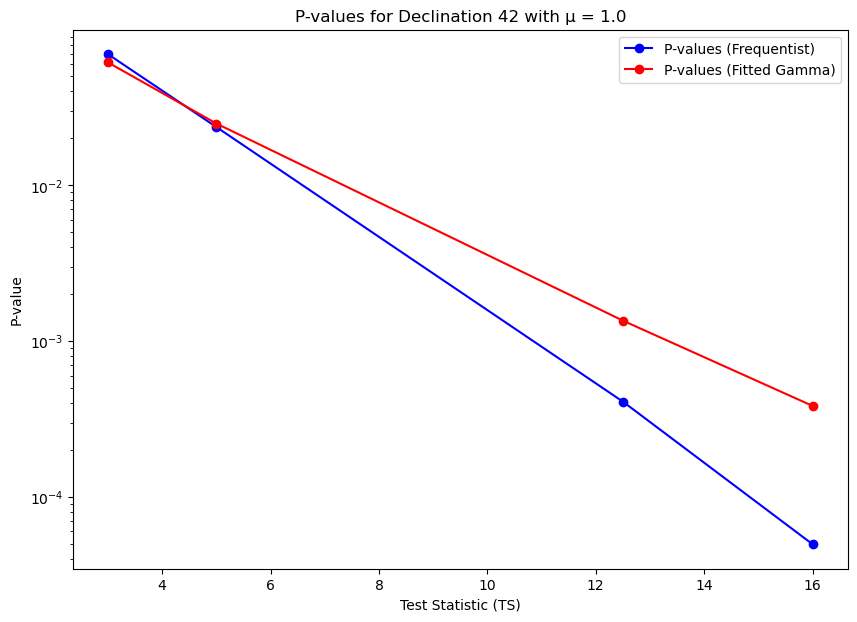

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, gammaincc
from scipy.optimize import curve_fit
from scipy.stats import gamma as gamma_dist
import os

# Load the data from the .npz file
filename = '/tmp/icpy/icpy/histogram_data_variable_bins_200_ts_density.npz'
data = np.load(filename)

# Access the individual arrays
histogram_2d = data['histogram_2d']
x_edges = data['x_edges']
y_edges = data['y_edges']

# Define the specific declination to analyze
declination = 42  # Replace with the desired declination

# Find the index corresponding to the desired declination
declination_index = np.argmin(np.abs(x_edges - declination))

# Extract the 1D histogram for the chosen declination
histogram_1d = histogram_2d[declination_index, :]

# Calculate the bin centers for the y-axis (hat_ts values)
hx = 0.5 * (y_edges[1:] + y_edges[:-1])

# Define the gamma distribution function
def gamma_dist_func(x, a, b):
    return b**a * x ** (a - 1) * np.exp(-b * x) / gamma(a)

# Define the function to fit the gamma distribution
def fit_gamma(x, y, mu_cut):
    x_fit = x[x > mu_cut]
    y_fit = y[x > mu_cut]
    norm_factor = np.sum(y_fit)
    hy_fit_norm = y_fit / norm_factor
    popt, pcov = curve_fit(gamma_dist_func, x_fit, hy_fit_norm, p0=[0.5, 0.5])
    return norm_factor, popt

# Define the TS values for which to calculate the p-values
ts_values = np.array([3, 5, 12.5, 16])

# Fit the gamma distribution to the 1D histogram data for the selected declination
mu_cut = 1.0  # Set the cutoff (adjust as necessary)
norm_factor, popt = fit_gamma(hx, histogram_1d, mu_cut)

# Use fitted parameters for gamma distribution
a, b = popt

# Calculate p-values from the raw distribution (frequentist approach)
p_values_frequentist = np.array([np.sum(histogram_1d[hx >= ts]) / np.sum(histogram_1d) for ts in ts_values])

# Calculate p-values using the gamma distribution
p_values_fitted = np.array([gammaincc(a, b * ts) for ts in ts_values])

# Clip y-values to ensure they are not below 10^-8
p_values_frequentist = np.clip(p_values_frequentist, 1e-8, None)
p_values_fitted = np.clip(p_values_fitted, 1e-8, None)

# Plotting the results for the single declination and single mu value
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the frequentist and fitted p-values for each TS value
ax.plot(ts_values, p_values_frequentist, 'bo-', label='P-values (Frequentist)')
ax.plot(ts_values, p_values_fitted, 'ro-', label='P-values (Fitted Gamma)')

# Set plot details
ax.set_yscale('log')
ax.set_xlabel('Test Statistic (TS)')
ax.set_ylabel('P-value')
ax.legend()
ax.set_title(f'P-values for Declination {declination} with μ = {mu_cut}')

# Save and show the plot
save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'
os.makedirs(save_dir, exist_ok=True)
filename = f"PValues_Declination_{declination}_Mu_{mu_cut}.png"
filepath = os.path.join(save_dir, filename)
fig.savefig(filepath)
print(f"Plot saved as {filepath}")
plt.show()

/tmp/ipykernel_4134/3470646037.py:22: RuntimeWarning: invalid value encountered in scalar power
  return b**a * x ** (a - 1) * np.exp(-b * x) / gamma(a)


Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_0.5.png


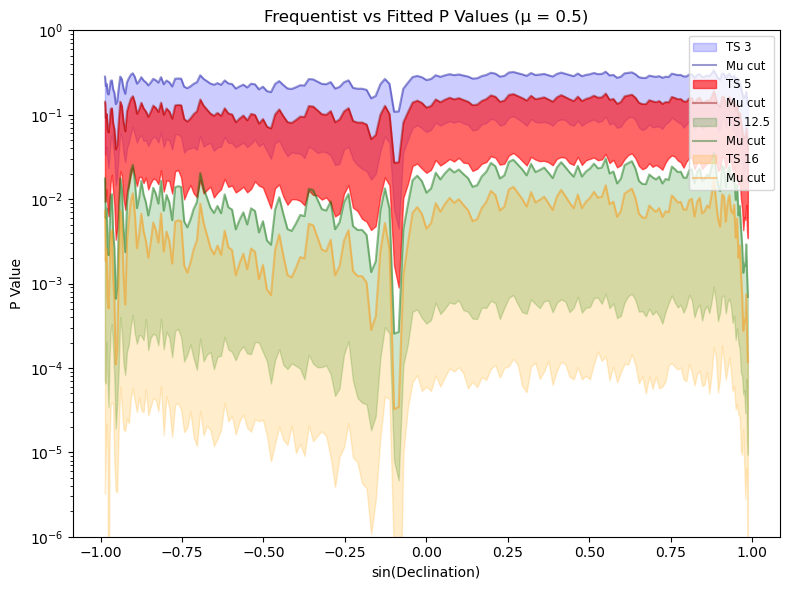

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_1.png


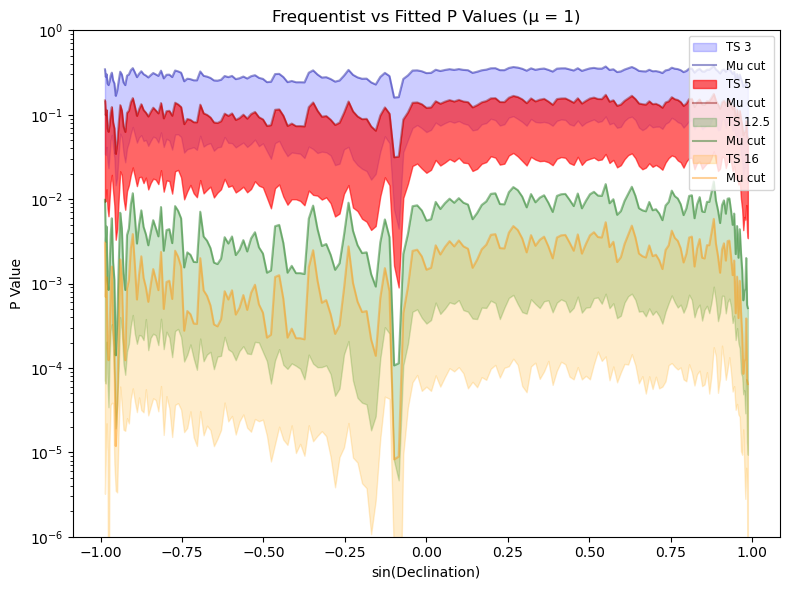

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_1.5.png


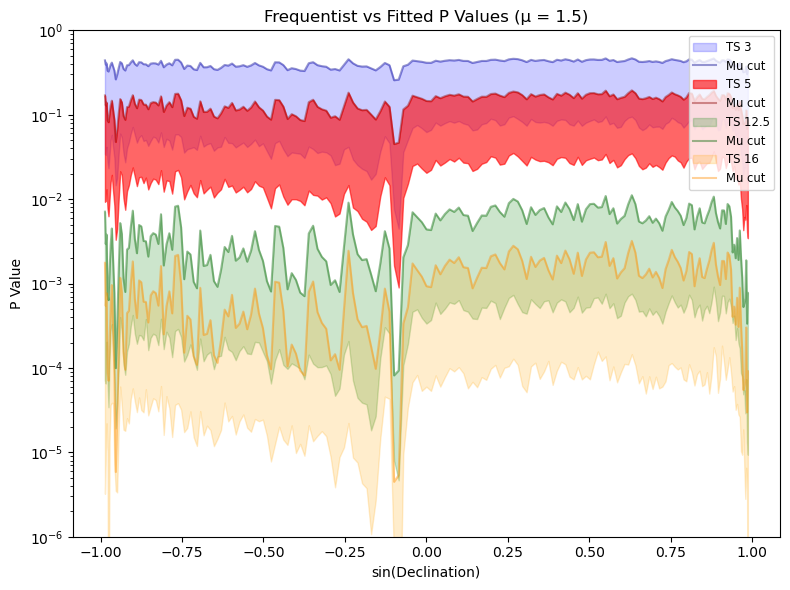

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_2.png


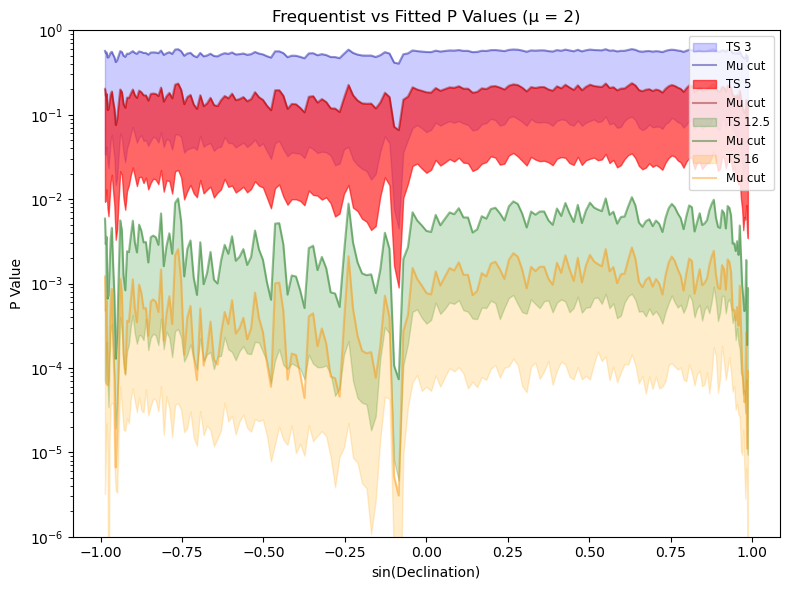

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_2.5.png


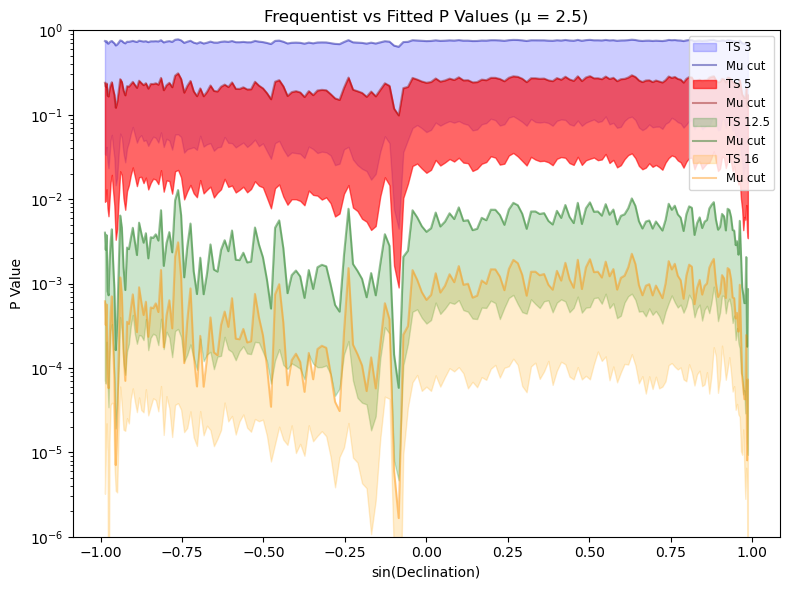

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_3.png


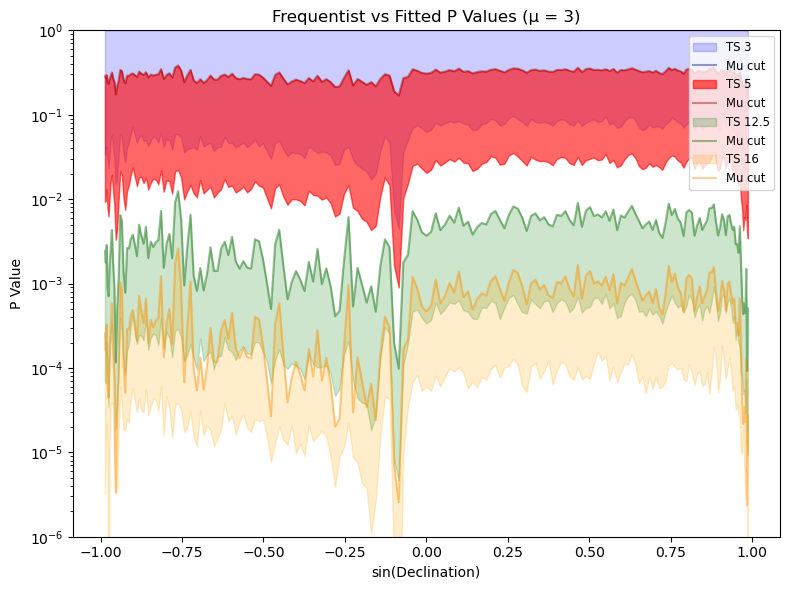

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_3.5.png


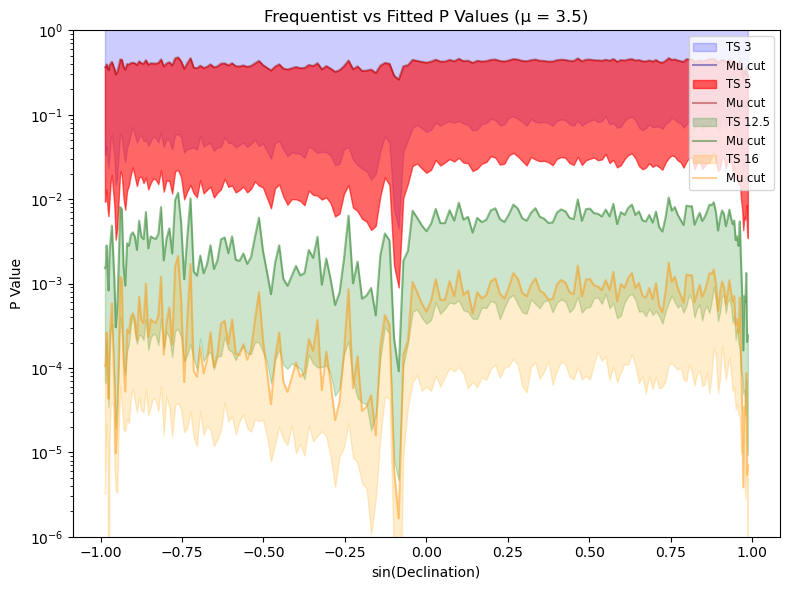

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_4.png


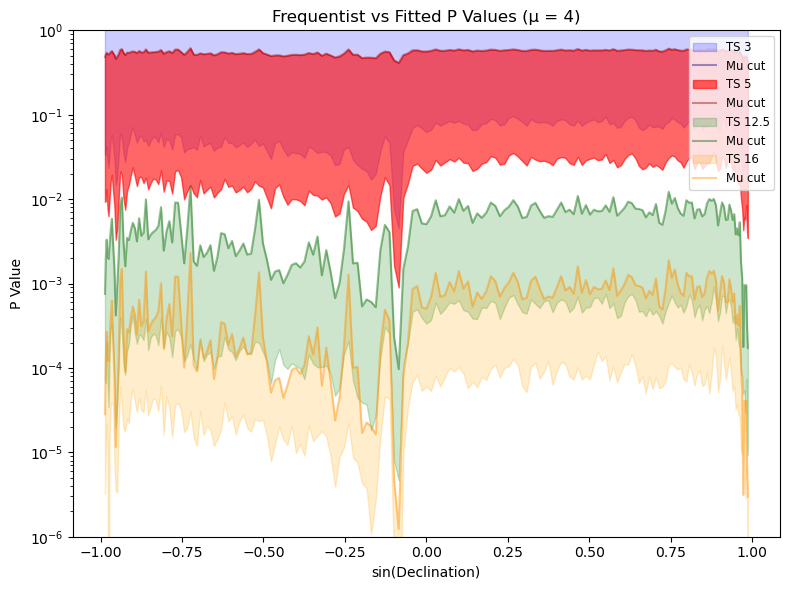

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_4.5.png


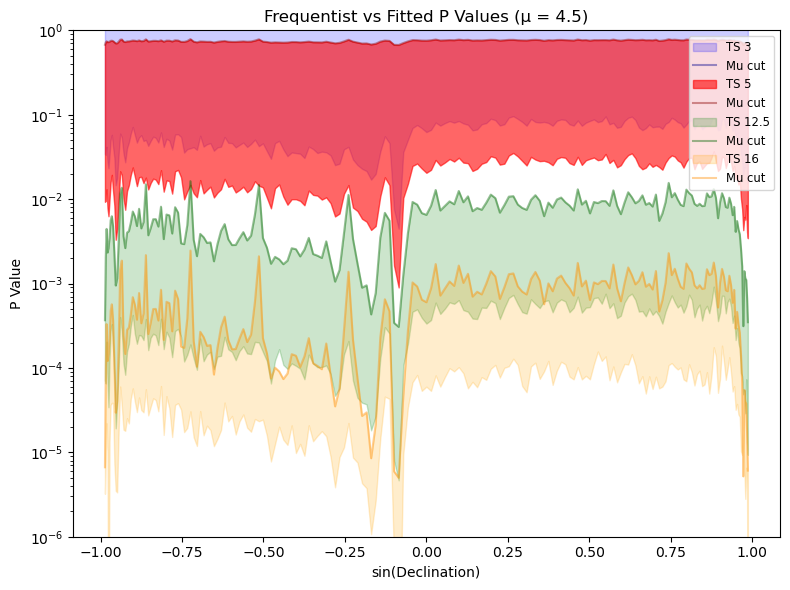

Plot saved as /tmp/hsperfdata_kennedyc/ProjectImages/PValues_Declination_mu_5.png


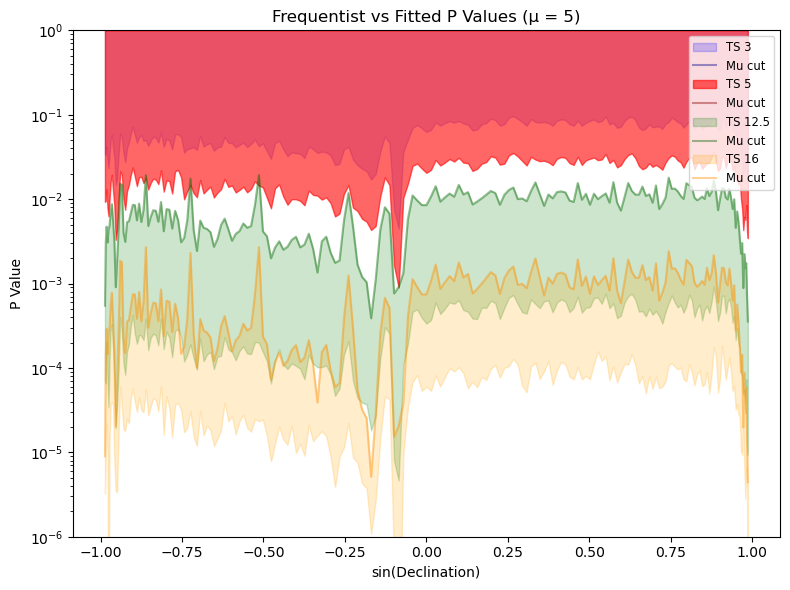

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import gamma as gamma_dist_scipy
from scipy.interpolate import interp1d
import os
import re

# Define the gamma distribution function
def gamma_dist(x, a, b, loc=0.0):
    return gamma_dist_scipy.pdf(x, a, scale=1/b, loc=loc)

# Define the function to fit the gamma distribution
def fit_gamma(x, y, mu_cut):
    x_fit = x[x > mu_cut]
    y_fit = y[x > mu_cut]
    norm_factor = np.sum(y_fit)
    hy_fit_norm = y_fit / norm_factor
    popt, _ = curve_fit(gamma_dist, x_fit, hy_fit_norm, p0=[1.0, 0.5, 0.0], maxfev=10000)
    return norm_factor, popt

# Compute the anti-cumulative distribution from a histogram
def compute_anti_cumulative(histogram):
    cumulative_hist = np.cumsum(histogram)
    return 1 - cumulative_hist / cumulative_hist[-1]

# Function to interpolate p-values from the gamma fit
def interpolate_p_from_fit(t_values, hx, mu_cut, norm_factor, popt):
    gamma_pdf_fit = norm_factor * gamma_dist_scipy.pdf(hx[hx > mu_cut], *popt)
    interp_func = interp1d(hx[hx > mu_cut], gamma_pdf_fit, kind='linear', fill_value="extrapolate")
    return interp_func(t_values)

# Function to interpolate p-values from the raw data
def interpolate_p_from_data(t_values, hx, hy):
    interp_func = interp1d(hx, hy, kind='linear', fill_value="extrapolate")
    return interp_func(t_values)

# Define the TS values for which to calculate the p-values
ts_values = np.array([3, 5, 12.5, 16])

# Store the results for all declination bins
sin_x_edges = np.sin(np.radians(x_edges))
sin_x_midpoints = (sin_x_edges[:-1] + sin_x_edges[1:]) / 2  # Calculate the midpoints of sin(declination)

# Loop over mu values
mu_values = [2]  # Set the desired mu values here

for i, mu in enumerate(mu_values):
    frequentist_ts_3 = []
    fitted_ts_3 = []
    frequentist_ts_5 = []
    fitted_ts_5 = []
    frequentist_ts_12_5 = []
    fitted_ts_12_5 = []
    frequentist_ts_16 = []
    fitted_ts_16 = []

    for declination_index in range(len(sin_x_midpoints)):
        # Extract the 1D histogram for the current declination
        histogram_1d = histogram_2d[declination_index, :]
        
        total_counts = np.sum(histogram_1d)
        if total_counts > 0:
            ##############################
            ## Applying Gamma Fit Logic ##
            ##############################
            
            # Fit the gamma distribution to the 1D histogram data for the current declination
            norm_factor, popt = fit_gamma(hx, histogram_1d, mu)
            a, b = popt

            xi = 1  # Normalization factor
            ts_threshold = mu  # Set the threshold for the gamma fit

            # Calculate and store the empirical and fitted values for specific TS values
            for ts_value, emp_list, fitted_list in [
                (3, frequentist_ts_3, fitted_ts_3),
                (5, frequentist_ts_5, fitted_ts_5),
                (12.5, frequentist_ts_12_5, fitted_ts_12_5),
                (16, frequentist_ts_16, fitted_ts_16)
            ]:
                # Frequentist p-value
                empirical_p_value = np.sum(histogram_1d[hx >= ts_value]) / np.sum(histogram_1d)
                emp_list.append(empirical_p_value)

                # Fitted p-value using the `ts_to_pvalue` function
                fitted_p_value = ts_to_pvalue(ts_value, xi, a, b, ts_threshold)
                fitted_list.append(fitted_p_value)

    # Clip y-values to ensure they are not below 10^-8
    frequentist_ts_3 = np.clip(frequentist_ts_3, 1e-8, None)
    fitted_ts_3 = np.clip(fitted_ts_3, 1e-8, None)
    
    frequentist_ts_5 = np.clip(frequentist_ts_5, 1e-8, None)
    fitted_ts_5 = np.clip(fitted_ts_5, 1e-8, None)
    
    frequentist_ts_12_5 = np.clip(frequentist_ts_12_5, 1e-8, None)
    fitted_ts_12_5 = np.clip(fitted_ts_12_5, 1e-8, None)
    
    frequentist_ts_16 = np.clip(frequentist_ts_16, 1e-8, None)
    fitted_ts_16 = np.clip(fitted_ts_16, 1e-8, None)

    # Create a new figure and axis for each mu value
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_ylim(1e-6, None)

    # Plot for each TS level with fill_between
    ax.fill_between(sin_x_midpoints, frequentist_ts_3, fitted_ts_3, color='blue', alpha=0.2, label='TS 3 ')
    ax.plot(sin_x_midpoints, fitted_ts_3, color='darkblue', linestyle='-', alpha=0.4, label='Mu cut ')

    ax.fill_between(sin_x_midpoints, frequentist_ts_5, fitted_ts_5, color='red', alpha=0.6, label='TS 5')
    ax.plot(sin_x_midpoints, fitted_ts_5, color='darkred', linestyle='-', alpha=0.4, label='Mu cut ')

    ax.fill_between(sin_x_midpoints, frequentist_ts_12_5, fitted_ts_12_5, color='green', alpha=0.2, label='TS 12.5')
    ax.plot(sin_x_midpoints, fitted_ts_12_5, color='darkgreen', linestyle='-', alpha=0.4, label='Mu cut ')

    ax.fill_between(sin_x_midpoints, frequentist_ts_16, fitted_ts_16, color='orange', alpha=0.2, label='TS 16')
    ax.plot(sin_x_midpoints, fitted_ts_16, color='darkorange', linestyle='-', alpha=0.4, label='Mu cut ')

    ax.axhline(y=0, color='grey', linestyle='--', linewidth=0.5)
    ax.set_xlabel('sin(Declination)')
    ax.set_ylabel('P Value')
    ax.set_yscale('log')
    ax.set_title(f'Frequentist vs Fitted P Values (μ = {mu})')
    ax.legend(loc='upper right', fontsize='small')
    ax.grid(False)
    plt.tight_layout()

    # Save and show the plot
    save_dir = '/tmp/hsperfdata_kennedyc/ProjectImages'
    os.makedirs(save_dir, exist_ok=True)
    filename = f"PValues_Declination_mu_{mu}.png"
    filepath = os.path.join(save_dir, filename)
    fig.savefig(filepath)
    print(f"Plot saved as {filepath}")
    plt.show()
plt.show()
